In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [4]:
#Loading the data
df = pd.read_csv(r'E:\Portfolio Projects Dataset\naukri_com-job_sample.csv')

In [5]:
df.head()

company  \
0                            MM Media Pvt Ltd   
1                          find live infotech   
2         Softtech Career Infosystem Pvt. Ltd   
3                      Onboard HRServices LLP   
4  Spire Technologies and Solutions Pvt. Ltd.   

                                           education   experience  \
0  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    0 - 1 yrs   
1  UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...    0 - 0 yrs   
2  UG: Any Graduate - Any Specialization PG:Any P...    4 - 8 yrs   
3  UG: Any Graduate - Any Specialization PG:CA Do...  11 - 15 yrs   
4  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    6 - 8 yrs   

                                   industry  \
0          Media / Entertainment / Internet   
1  Advertising / PR / MR / Event Management   
2           IT-Software / Software Services   
3    Banking / Financial Services / Broking   
4           IT-Software / Software Services   

                                      jobdescription         jobid  \
0  Job Description   Send me Jobs like this Quali...  2.105160e+11   
1  Job Description   Send me Jobs like this Quali...  2.105160e+11   
2  Job Description   Send me Jobs like this - as ...  1.010170e+11   
3  Job Description   Send me Jobs like this - Inv...  8.101690e+10   
4  Job Description   Send me Jobs like this Pleas...  1.209160e+11   

                                 joblocation_address  \
0                                            Chennai   
1                                            Chennai   
2                                          Bengaluru   
3  Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...   
4                                          Bengaluru   

                                   jobtitle  numberofpositions  \
0  Walkin Data Entry Operator (night Shift)                NaN   
1        Work Based Onhome Based Part Time.               60.0   
2                    Pl/sql Developer - SQL                NaN   
3    Manager/ad/partner - Indirect Tax - CA                NaN   
4           JAVA Technical Lead (6-8 yrs) -                4.0   

                          payrate                   postdate site_name  \
0         1,50,000 - 2,25,000 P.A  2016-05-21 19:30:00 +0000       NaN   
1  1,50,000 - 2,50,000 P.A. 20000  2016-05-21 19:30:00 +0000       NaN   
2      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   
3      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   
4      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   

                                  skills                           uniq_id  
0                                   ITES  43b19632647068535437c774b6ca6cf8  
1                              Marketing  d4c72325e57f89f364812b5ed5a795f0  
2  IT Software - Application Programming  c47df6f4cfdf5b46f1fd713ba61b9eba  
3                               Accounts  115d28f140f694dd1cc61c53d03c66ae  
4  IT Software - Application Programming  a12553fc03bc7bcced8b1bb8963f97b4

In [6]:
df.shape

(22000, 14)

In [11]:
df.isnull().sum()

company                  0
experience               0
industry                 1
jobdescription           0
joblocation_address    497
jobtitle                 0
payrate                 93
skills                 524
dtype: int64

In [569]:
# Drop the columns that are not related to the Objective

#df = df.drop(['numberofpositions','site_name','education','jobid','postdate','uniq_id'],axis=1)

In [570]:
#Percentage Missing Values
for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    #percentage_missing = df[col].isnull().sum() / len(df) * 100
    print(f"{col} - {percentage_missing:.2f}%")

company - 0.00%
experience - 0.00%
industry - 0.00%
joblocation_address - 0.00%
jobtitle - 0.00%
payrate - 0.00%
skills - 0.00%
exp_range - 0.00%
exp_range_mean - 0.00%
min_exp - 0.00%
max_exp - 0.00%


In [14]:
df.dropna(subset=['company'], axis=0, inplace = True)

In [15]:
df.isnull().sum()

company                  0
experience               0
industry                 1
jobdescription           0
joblocation_address    497
jobtitle                 0
payrate                 93
skills                 524
dtype: int64

In [16]:
df.dropna(subset='industry', axis=0, inplace=True)

In [17]:
df.duplicated().sum()

75

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.isnull().sum()

company                  0
experience               0
industry                 0
jobdescription           0
joblocation_address    497
jobtitle                 0
payrate                 92
skills                 522
dtype: int64

In [21]:
mode_value = df['joblocation_address'].mode().iloc[0]
print(mode_value)

Bengaluru/Bangalore


In [22]:
df['joblocation_address'].fillna(mode_value, inplace=True)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_12564\688526030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joblocation_address'].fillna(mode_value, inplace=True)


In [23]:
mode_value = df['skills'].mode().iloc[0]
print(mode_value)

IT Software - Application Programming


In [24]:
df['skills'].fillna(mode_value, inplace=True)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_12564\2382838017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skills'].fillna(mode_value, inplace=True)


In [25]:
mode_value = df['payrate'].mode().iloc[0]
df['payrate'].fillna(mode_value, inplace = True)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_12564\2252368015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payrate'].fillna(mode_value, inplace = True)


In [26]:
#Extract the range from experience

df['exp_range'] = df['experience'].str.extract(r'(\d+ - \d+)')

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_12564\441500147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exp_range'] = df['experience'].str.extract(r'(\d+ - \d+)')


In [27]:
mode_value = df['exp_range'].mode().iloc[0]
df['exp_range'].fillna(mode_value, inplace = True)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_12564\527977923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exp_range'].fillna(mode_value, inplace = True)


In [28]:
df.isnull().sum()

company                0
experience             0
industry               0
jobdescription         0
joblocation_address    0
jobtitle               0
payrate                0
skills                 0
exp_range              0
dtype: int64

In [29]:
# # Function to convert Range to Number
# def convert_exp(exp_range):
#     try:
#         min_exp, max_exp = map(int, exp_range.split(' - '))
#         return (min_exp + max_exp) / 2
#     except (ValueError, AttributeError):
#         return np.nan

    def convert_exp(exp_range):
        min_exp, max_exp = map(int, exp_range.split(' - '))
        return (min_exp + max_exp) / 2

In [30]:
df['exp_range_mean'] = df['exp_range'].apply(convert_exp)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_12564\4264616094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exp_range_mean'] = df['exp_range'].apply(convert_exp)


In [31]:
# expand=True, the str.split() method will split the strings in the 'exp_range' column and return a DataFrame with each 
# split part (i.e., the minimum and maximum values) in separate columns. In your specific case, this would result in two columns, 
# one for the minimum value and another for the maximum value.

exp_split = df['exp_range'].str.split('-', expand=True)
exp_split.columns = ['min_exp', 'max_exp']
exp_split.head(5)

min_exp max_exp
0      0        1
1      0        0
2      4        8
3     11       15
4      6        8

In [32]:
df = pd.concat([df, exp_split], axis = 1, sort = False)

In [33]:
df.isnull().sum()

company                0
experience             0
industry               0
jobdescription         0
joblocation_address    0
jobtitle               0
payrate                0
skills                 0
exp_range              0
exp_range_mean         0
min_exp                0
max_exp                0
dtype: int64

In [34]:
df.joblocation_address = df['joblocation_address'].apply(lambda x: x.split(','))
df = df.explode('joblocation_address')
df

company   experience  \
0                                      MM Media Pvt Ltd    0 - 1 yrs   
1                                    find live infotech    0 - 0 yrs   
2                   Softtech Career Infosystem Pvt. Ltd    4 - 8 yrs   
3                                Onboard HRServices LLP  11 - 15 yrs   
3                                Onboard HRServices LLP  11 - 15 yrs   
...                                                 ...          ...   
21996  Careernet Technologies Pvt Ltd hiring for Client    3 - 5 yrs   
21997                                    Musk - Startup    2 - 4 yrs   
21998                                      Confidential   7 - 12 yrs   
21998                                      Confidential   7 - 12 yrs   
21999                   Cambio Consulting India Pvt Ltd   5 - 10 yrs   

                                       industry  \
0              Media / Entertainment / Internet   
1      Advertising / PR / MR / Event Management   
2               IT-Software / Software Services   
3        Banking / Financial Services / Broking   
3        Banking / Financial Services / Broking   
...                                         ...   
21996           IT-Software / Software Services   
21997                      Internet / Ecommerce   
21998           IT-Software / Software Services   
21998           IT-Software / Software Services   
21999           IT-Software / Software Services   

                                          jobdescription joblocation_address  \
0      Job Description   Send me Jobs like this Quali...             Chennai   
1      Job Description   Send me Jobs like this Quali...             Chennai   
2      Job Description   Send me Jobs like this - as ...           Bengaluru   
3      Job Description   Send me Jobs like this - Inv...              Mumbai   
3      Job Description   Send me Jobs like this - Inv...           Bengaluru   
...                                                  ...                 ...   
21996  Job Description   Send me Jobs like this Looki...             Gurgaon   
21997  Job Description   Send me Jobs like this Work ...           Bengaluru   
21998  Job Description   Send me Jobs like this We ar...           Delhi NCR   
21998  Job Description   Send me Jobs like this We ar...           Bengaluru   
21999  Job Description   Send me Jobs like this Job d...           Bengaluru   

                                                jobtitle  \
0               Walkin Data Entry Operator (night Shift)   
1                     Work Based Onhome Based Part Time.   
2                                 Pl/sql Developer - SQL   
3                 Manager/ad/partner - Indirect Tax - CA   
3                 Manager/ad/partner - Indirect Tax - CA   
...                                                  ...   
21996      Java Backend Developers for a Product Company   
21997                    Full Stack Development Engineer   
21998  Sr UI Developer/ Technical Lead - Html/ CSS/ J...   
21998  Sr UI Developer/ Technical Lead - Html/ CSS/ J...   
21999                              RF Firmware Engineers   

                              payrate                                 skills  \
0             1,50,000 - 2,25,000 P.A                                   ITES   
1      1,50,000 - 2,50,000 P.A. 20000                              Marketing   
2          Not Disclosed by Recruiter  IT Software - Application Programming   
3          Not Disclosed by Recruiter                               Accounts   
3          Not Disclosed by Recruiter                               Accounts   
...                               ...                                    ...   
21996        8,50,000 - 14,00,000 P.A  IT Software - Application Programming   
21997      Not Disclosed by Recruiter  IT Software - Application Programming   
21998      Not Disclosed by Recruiter  IT Software - Application Programming   
21998      Not Disclosed by Recruiter  IT Software - Application Programming   
21999   

In [35]:
df['joblocation_address'] = df['joblocation_address'].apply(lambda x: x.strip())

In [36]:
# df['jobs'] = df['joblocation_address'].apply(lambda x: x.split(' '))
# df1 = df.explode('joblocation_address')

In [37]:
# for loc in df['joblocation_address'].unique():
#     print(loc)

In [38]:
replacements = {
   'joblocation_address': {
      r'(Bengaluru/Bangalore)':'Bangalore',
      r'Bengaluru':'Bangalore',
      r'Hyderabad/Secunderabad':'Hyderabad',
       r'Secunderabad':'Hyderabad', 
      r'Delhi/NCR\(National Capital Region\)':'NCR',
      r'Noida|Noida/Greater Noida':'NCR',
      r'Ghaziabad':'NCR',
      r'Gurgaon|gurgaon':'NCR',
      r'NCR/Greater NCR':'NCR',
      r'Greater NCR':'NCR',
       r'Bangalore Bangalore':'Bangalore',
       r'Ernakulam / Kochi/ Cochin':'Cochin',
       r'Cochin/ Kochi/ Ernakulam':'Cochin',
       r'Visakhapatnam/Vizag':'Visakhapatnam',
       r'Kullu/Manali':'Manali',
       r'Vadodara/Baroda':'Baroda',
       r'Kozhikode / Calicut':'Calicut',
       r'Bangalore / Bangalore':'Bangalore',
       r'Other City\(s\) in Gujarat':'Gujarat',
       r'primary_city":"Hyderabad"':'Hyderabad',
       r'"primary_state":"Andhra Pradesh':'Andhra Pradesh',
       r'Other City\(s\) in Andhra Pradesh':'Andhra Pradesh',
       r'India - Bangalore':'Bangalore',
       r'Mysoru / Mysore':'Mysore',
       r'India-Karnataka-Bangalore|18':'Bangalore',
       r'Other City\(s\) in Karnataka':'Karnataka',
       r'IN-IN':'India',
       r'Other City(s) in Kerala':'Kerala',
       r'IN-MH-Mumbai-Prism Towers / 31002|Navi Mumbai|NAVI MUMBAI':'Mumbai',   
       r'JOB LOCATION: MUMBAI (INDIA)':'Mumbai',
       r'Mumbai Suburbs':'Mumbai',
       r'Dubai/ UAE':'UAE',
       r'PUNE Tirunelveli':'Pune',
       r'Thrissur / Trichur':'Thrissur',
       r'Dadra & Nagar Haveli / Silvassa':'Dadra',
       r'NCR(National Capital Region)':'NCR',
       r'Panjim/Panaji':'Panaji',
       r'United States \(U.S\)':'USA',
       r'Navi Mumbai Suburbs':'Mumbai',
       r'Alappuzha / Alleppey':'Alleppey',
       r'United Kingdom \(U.K\)':'UK',
       r'Anywhere India':'India',
       r'Other City\(s\) in Kerala':'Kerala',
       r'IN - KA - Bangalore':'Bangalore',
       r'Location: White Field , Bangalore':'Bangalore',
       r'Other City\(s\) in Uttar Pradesh|Uttarpradesh':'Uttar Pradesh',
       r'Other City\(s\) in Karnataka':'Karnataka',
       r'Other City\(s\) in Maharasht':'Maharashtra',
       r'Palakkad / Palghat':'Palakkad',
       r'Bhilai/Bhillai':'Bhillai',
       r'India-NCR-NCR':'NCR',
       r'INDIA - NCR':'NCR',
       r'#NAME?':'Bangalore',
       r'Other City\(s\) in Gujarat|gujarat':'Gujarat',
       r'Other City\(s\) in Bihar':'Bihar',
       r'Thiruvananthapuram':'Trivandrum',
       r'Pune \(Salunke Vihar\)':'Pune',
       r'Varanasi / Banaras':'Varanasi',
       r'NCR/ NCR':'NCR',
       r'Other City\(s\) in Jammu & Kashmir|Jammuandkashmir Othe':'Jammu & Kashmir',
       r'Other City\(s\) in Punjab':'Punjab',
       r'INDIA-NOIDA-NOIDA':'NCR',
       r'Asia-India-Greater Mumbai':'Mumbai',
       r'Indonesia-Jakarta':'Indonesia',
       r'India - Mumbai':'Mumbai',
       r'Mumbai ,Mumbai':'Mumbai',
       r'Other City\(s\) in Maharashtra':'Maharashtra',
       r'Palakkad / Palghat':'Palakkad',
       r'IN-MH-Greater Mumbai-Mumbai-Voltas C':'Mumbai',
       r'IN-MH-Greater Mumbai-Mumbai':'Mumbai',
       r'mumbai/pune':'Mumbai',
       r'IN-DL-New NCR':'NCR',
       r'Other City\(s\) in Uttar Pradesh':'Uttar Pradesh',
       r'Other City\(s\) in Goa':'Goa',
       r'Bangalore?':'Bangalore',
       r'IN - DL - New NCR':'NCR',
       r'Pune (Salunke Vihar)':'NCR',
       r'Other City\(s\) in Jammu & Kashmir':'Jammu & Kashmir',
       r'Location: NCR':'NCR',
       r'United Kingdom (U.K)':'UK',
       r'Goregaon (E)|GOREGOAN':'Goregaon',
       r'Other City\(s\) in Uttar Pradesh':'Uttar Pradesh',
       r'NCR/GreaterNCR':'NCR',
       r'NCR,Mumbai/ Secunderabad':'NCR, Mumbai, Hyderabad',
       r'Bangalore /NCR':'Bangalore, NCR',
       r'Haryana Other':'Haryana',
       r'Other City\(s\) in Gujarat':'Gujarat',
       r'Kollam / Quilon':'Kollam',
       r'Hyderabad / Hyderabad':'Hyderabad',
       r'BangalorePUNE':'Bangalore Pune',
       r'Faridabad':'NCR',
       r'PUNE':'Pune',
       r'Delhi/NCR(National Capital Region)':'NCR',
       r'Uttaranchal Other':'Uttaranchal',
       r'Delhi/NCR':'NCR',
       r'Bangalore/ Bangalore':'Bangalore',
       r'Other City\(s\) in Chhattisgarh':'Chhattisgarh',
       r'Bangalore?':'Bangalore',
       r'Other City(s) in Maharasht':'Maharashtra',
       r'BangaloreHyderabad':'Bangalore Hyderabad',
       r'BangaloreKolkata':'Bangalore Kolkata',
       r'NCR(National Capital Region)':'NCR',
       r'Karnataka Other':'Karnataka',
       r'Uttarpradesh Other':'Uttarpradesh',
       r'Andhrapradesh Other':'Andhra pradesh',
       r'Arunachalpradesh Oth':'Arunachal pradesh',
       r'Goa Other':'Goa',
       r'Other City\(s\) in Tamil Nadu':'Tamil Nadu',
       r'Location: White Field':'Bangalore',
       r'Thane\(Turbhe\)|THANE':'Thane',
       r'IND-Maharashtra-Thane|maharashtra':'Maharashtra',
       r'Tripura Other':'Tripura',
       r'Goregaon \(E\)':'Goregaon',
       r'Bangalore/Mumbai':'Bangalore Mumbai',
       r'Recruitment|Selection|Matriculation and Alumni Impact - Pune/Mumbai':'Mumbai',
       r'India-Mumbai':'Mumbai',
       r'National Team Mumbai':'Mumbai',
       r'National Team - Mumbai':'Mumbai',
       r'Other City\(s\) in Punjab':'Punjab',
       r'punjab':'Punjab',
       r'IN-HR-NCR':'NCR',
       r'Pune \(Swarga':'Pune',
       r'IN - DL - New Delhi|IN-DL-New Delhi':'Delhi',
       r'HR|haryana|Other City\(s\) in Har':'Haryana',
       r'IND|south india':'India',
       r'India; NCR|India-NCR':'NCR',
       r'NCR\(National Capital Region\)|Nainital NCR':'NCR',
       r'PANVEL|Raigarh':'Panvel',
       r'Madhyapradesh Other':'Madhya pradesh',
       r'Rajasthan Other':'Rajasthan',
       r'BANDRA|ANDHERI|VASHI|BORIVILLI|DOMBIVLLI|MULUND|GHATKOPAR|COLABA|NARIMAN POINT.':'Mumbai',
       r'Mussoorie Mysore':'Mysore',
       r'OOTY Orchha':'Ooty',
       r'JOB LOCATION: MUMBAI \(IndiaIA\)|Mumbai Corporate Office':'Mumbai',
       r'nagpur':'Nagpur',
       r'New Delhi':'Delhi',
       r'Bangalore\?|Near Bangalore|India-Bangalore':'Bangalore',
       r'Jharkhand Other':'Jharkhand',
   
         
            
   }
}

df.replace(replacements, regex=True, inplace=True)
df['joblocation_address'].value_counts()

Bangalore                9528
Mumbai                   6299
NCR                      5534
Chennai                  3337
Hyderabad / Hyderabad    2619
                         ... 
Chicago                     1
Siliguri                    1
Alleppey                    1
Udupi                       1
Jhansi                      1
Name: joblocation_address, Length: 358, dtype: int64

In [39]:
#df.joblocation_address.unique()

In [40]:
df.joblocation_address.value_counts().sort_values(ascending = False).sort_index()

              19
Adilabad       2
Agartala       7
Agra          28
Ahmedabad    394
            ... 
noida         14
palghar        1
pune           4
seoni          1
thane          2
Name: joblocation_address, Length: 358, dtype: int64

In [41]:
df.joblocation_address = df.joblocation_address.str.split(' ')
df = df.explode('joblocation_address')

In [42]:
df

company   experience  \
0                         MM Media Pvt Ltd    0 - 1 yrs   
1                       find live infotech    0 - 0 yrs   
2      Softtech Career Infosystem Pvt. Ltd    4 - 8 yrs   
3                   Onboard HRServices LLP  11 - 15 yrs   
3                   Onboard HRServices LLP  11 - 15 yrs   
...                                    ...          ...   
21997                       Musk - Startup    2 - 4 yrs   
21998                         Confidential   7 - 12 yrs   
21998                         Confidential   7 - 12 yrs   
21998                         Confidential   7 - 12 yrs   
21999      Cambio Consulting India Pvt Ltd   5 - 10 yrs   

                                       industry  \
0              Media / Entertainment / Internet   
1      Advertising / PR / MR / Event Management   
2               IT-Software / Software Services   
3        Banking / Financial Services / Broking   
3        Banking / Financial Services / Broking   
...                                         ...   
21997                      Internet / Ecommerce   
21998           IT-Software / Software Services   
21998           IT-Software / Software Services   
21998           IT-Software / Software Services   
21999           IT-Software / Software Services   

                                          jobdescription joblocation_address  \
0      Job Description   Send me Jobs like this Quali...             Chennai   
1      Job Description   Send me Jobs like this Quali...             Chennai   
2      Job Description   Send me Jobs like this - as ...           Bangalore   
3      Job Description   Send me Jobs like this - Inv...              Mumbai   
3      Job Description   Send me Jobs like this - Inv...           Bangalore   
...                                                  ...                 ...   
21997  Job Description   Send me Jobs like this Work ...           Bangalore   
21998  Job Description   Send me Jobs like this We ar...               Delhi   
21998  Job Description   Send me Jobs like this We ar...                 NCR   
21998  Job Description   Send me Jobs like this We ar...           Bangalore   
21999  Job Description   Send me Jobs like this Job d...           Bangalore   

                                                jobtitle  \
0               Walkin Data Entry Operator (night Shift)   
1                     Work Based Onhome Based Part Time.   
2                                 Pl/sql Developer - SQL   
3                 Manager/ad/partner - Indirect Tax - CA   
3                 Manager/ad/partner - Indirect Tax - CA   
...                                                  ...   
21997                    Full Stack Development Engineer   
21998  Sr UI Developer/ Technical Lead - Html/ CSS/ J...   
21998  Sr UI Developer/ Technical Lead - Html/ CSS/ J...   
21998  Sr UI Developer/ Technical Lead - Html/ CSS/ J...   
21999                              RF Firmware Engineers   

                              payrate                                 skills  \
0             1,50,000 - 2,25,000 P.A                                   ITES   
1      1,50,000 - 2,50,000 P.A. 20000                              Marketing   
2          Not Disclosed by Recruiter  IT Software - Application Programming   
3          Not Disclosed by Recruiter                               Accounts   
3          Not Disclosed by Recruiter                               Accounts   
...                               ...                                    ...   
21997      Not Disclosed by Recruiter  IT Software - Application Programming   
21998      Not Disclosed by Recruiter  IT Software - Application Programming   
21998      Not Disclosed by Recruiter  IT Software - Application Programming   
21998      Not Disclosed by Recruiter  IT Software - Application Programming   
21999       12,00,000 - 22,00,000 P.A       IT Software - System Programming   

      exp_range  exp_range_mean min_exp max_exp  
0         0 - 1     

In [43]:
#df.drop('joblocation_address1', axis=1, inplace=True)

In [44]:
#df.drop('jobs', axis=1, inplace=True)

In [45]:
df.drop('jobdescription', axis=1, inplace=True)

In [46]:
df.shape

(46136, 11)

In [47]:
#pd.set_option('display.max_rows',None)

In [48]:
df['skills1'] = df['skills'].copy()

In [49]:
df['skills1'] = df['skills1'].str.replace(r'^IT Software - .*', 'IT Software', regex=True) #replace all IT software

In [50]:
df['skills'] = df['skills1']

In [51]:
for x in df['skills'].unique():
    print(x)

ITES
Marketing
IT Software
Accounts
Production
Sales
Executive Assistant
Engineering Design
Financial Services
Hotels
HR
Supply Chain
Architecture
Legal
Site Engineering
Journalism
Strategy
Medical
Design
Defence Forces
Teaching
Travel
TV
Fashion Designing
IT Hardware
Analytics & Business Intelligence
Beauty/Fitness/Spa Services
Top Management
Export
Packaging
Shipping


In [52]:
df.drop('skills1', axis=1, inplace = True)

In [389]:
#jobtitle
# for job in df.jobtitle.unique():
#     print(job)
# ----------------------------
# # List of keywords to search for in job titles
# keywords = ['Digital Marketing', 'Java Developers', 'SQL', 'PHP Developers']

# # Create a new column 'selected_job_title' with extracted job titles
# df['selected_job_title'] = df['jobtitle'].apply(lambda x: next((kw for kw in keywords if kw.lower() in x.lower()), None))

# # Display the DataFrame with the selected job titles
# print(df[['jobtitle', 'selected_job_title']])


# -----------------------------------
# We define a list of keywords (keywords) that we want to search for in the job titles.

# We use a lambda function with the .apply() method to search for the keywords in each job title. It returns the first matching keyword (case-insensitive) or None if no keyword is found.

# We create a new column called 'selected_job_title' to store the extracted job titles based on the keywords.

# We display the DataFrame with the 'jobtitle' and 'selected_job_title' columns to show the extracted job titles.

In [53]:
df['industry'].unique()

array(['Media / Entertainment / Internet',
       'Advertising / PR / MR / Event Management',
       'IT-Software / Software Services',
       'Banking / Financial Services / Broking',
       'Aviation / Aerospace Firms',
       'Industrial Products / Heavy Machinery', 'FMCG / Foods / Beverage',
       'Recruitment / Staffing', 'Internet / Ecommerce',
       'Travel / Hotels / Restaurants / Airlines / Railways',
       'BPO / Call Centre / ITES', 'Pharma / Biotech / Clinical Research',
       'Real Estate / Property', 'Insurance', 'Facility Management',
       'Publishing', 'Education / Teaching / Training',
       'Retail / Wholesale',
       'Automobile / Auto Anciliary / Auto Components',
       'Chemicals / PetroChemical / Plastic / Rubber',
       'Government / Defence', 'Accounting / Finance',
       'Textiles / Garments / Accessories',
       'Semiconductors / Electronics', 'Telecom/ISP',
       'Medical / Healthcare / Hospitals', 'Legal',
       'Courier / Transportation / Frei

In [54]:
df.shape

(46136, 11)

In [55]:
df1 = df.copy()

In [56]:
df1['pay1'] = df1['payrate']

In [57]:
df1[['exp_range_mean','pay1']].sort_values(by = 'exp_range_mean').head(10)

exp_range_mean                                               pay1
19532             0.0                         Not Disclosed by Recruiter
5181              0.0  2,00,000 - 3,00,000 P.A. BEST IN Industry [ Sa...
5181              0.0  2,00,000 - 3,00,000 P.A. BEST IN Industry [ Sa...
5181              0.0  2,00,000 - 3,00,000 P.A. BEST IN Industry [ Sa...
15153             0.0                         Not Disclosed by Recruiter
5219              0.0                                       1,00,000 P.A
15153             0.0                         Not Disclosed by Recruiter
15153             0.0                         Not Disclosed by Recruiter
20324             0.0                            2,00,000 - 5,00,000 P.A
15153             0.0                         Not Disclosed by Recruiter

In [58]:
import re

In [59]:
# Define a function to extract salary ranges using regular expressions
def extract_salary(text):
    # Define a regular expression pattern to capture salary ranges
    pattern = r'(\d{1,3}(?:,\d{3})*(?:\s*-\s*\d{1,3}(?:,\d{3})*)?)\s*(?:P\.A\.|P\.A\b|P\.A)?'
    matches = re.findall(pattern, text)
    
    # Filter out matches that contain non-digit characters
    valid_matches = [match for match in matches if re.search(r'\d', match)]
    
    # Return the valid matches as a list
    return valid_matches

# Apply the extract_salary function to the "pay1" column
df1['Salary_Range'] = df1['pay1'].apply(extract_salary) # return the list of values

In [60]:
df1['sal'] = df1['Salary_Range']

In [61]:
# Function to convert a list to a string and remove commas (',') in between numbers
def list_to_string_and_remove_commas(lst):
    if not lst:  # Check if the list is empty
        return None
    else:
        # Join the list elements with commas and remove commas between numbers
        return ', '.join(map(lambda x: ''.join(x.split(',')) if isinstance(x, str) else str(x), lst))

# Apply the function to the "salary" column
df1['sal'] = df1['sal'].apply(list_to_string_and_remove_commas)

In [62]:
df1['sal2'] = df1['sal'] #Last comma is removed

In [63]:
def process_salary_range(salary_range):
    if salary_range is not None:
        # Remove commas from the salary range and concatenate the numbers
        salary_range = re.sub(r',', '', salary_range)
        return salary_range.replace(' - ', '-')
    return None

# Apply the process_salary_range function to the "Sal2" column
df1['sal2'] = df1['sal2'].apply(process_salary_range) # All the commas are removed but there are white spaces

In [64]:
# Define a function to process salary ranges
def process_salary_range(salary_range):
    if salary_range is not None:
        # Remove all spaces and commas from the salary range and concatenate the numbers
        salary_range = re.sub(r'[,\s]', '', salary_range)
        return salary_range.replace('-', '-')
    return None

# Apply the process_salary_range function to the "Sal2" column
df1['sal2'] = df1['sal2'].apply(process_salary_range) # removed white spaces after removing the comma

In [65]:
df2 = df1.copy()

In [66]:
df2['sal2']

0             150000-225000
1        150000-25000020000
2                      None
3                      None
3                      None
                ...        
21997                  None
21998                  None
21998                  None
21998                  None
21999       1200000-2200000
Name: sal2, Length: 46136, dtype: object

In [67]:
# Define a function to split the range
def split_range(range_str):
    if range_str is None:
        return None, None
    min_max = range_str.split('-')
    if len(min_max) == 2:
        min_value = int(min_max[0]) if min_max[0] else None
        max_value = int(min_max[1]) if min_max[1] else None
        return min_value, max_value
    else:
        return None, None

# Apply the split_range function to create new columns
df2['sal_min'], df2['sal_max'] = zip(*df2['sal2'].fillna('-').apply(split_range))

# # Define a function to split the range and convert to integers
# def split_range(range_str):
#     if range_str is None:
#         return None, None
#     min_max = range_str.split('-')
#     if len(min_max) == 2:
#         min_value = int(re.sub(r'[^0-9]', '', min_max[0])) if min_max[0] else None
#         max_value = int(re.sub(r'[^0-9]', '', min_max[1])) if min_max[1] else None
#         return min_value, max_value
#     else:
#         return None, None

# # Apply the split_range function to create new columns
# df2['sal_min'], df2['sal_max'] = zip(*df2['sal2'].fillna('-').apply(split_range))


In [68]:
df2['sal_min']

0         150000.0
1         150000.0
2              NaN
3              NaN
3              NaN
           ...    
21997          NaN
21998          NaN
21998          NaN
21998          NaN
21999    1200000.0
Name: sal_min, Length: 46136, dtype: float64

In [69]:
# Function to remove '.0' from numbers
def remove_decimal(val):
    if pd.notna(val):
        return str(int(val))
    else:
        return val

# Apply the function to the column
df2['sal_min'] = df2['sal_min'].apply(remove_decimal)

In [70]:
df2["sal_min"]

0         150000
1         150000
2            NaN
3            NaN
3            NaN
          ...   
21997        NaN
21998        NaN
21998        NaN
21998        NaN
21999    1200000
Name: sal_min, Length: 46136, dtype: object

In [71]:
df2["sal_max"]

0        2.250000e+05
1        2.500002e+10
2                 NaN
3                 NaN
3                 NaN
             ...     
21997             NaN
21998             NaN
21998             NaN
21998             NaN
21999    2.200000e+06
Name: sal_max, Length: 46136, dtype: float64

In [72]:
# Function to remove 'e+05' notation
def remove_scientific_notation(val):
    if pd.notna(val):
        return str(val).replace('e+05', '')
    else:
        return val

# Convert the column to strings and apply the function
df2['sal_max'].astype(str).apply(remove_scientific_notation)


0             225000.0
1        25000020000.0
2                  nan
3                  nan
3                  nan
             ...      
21997              nan
21998              nan
21998              nan
21998              nan
21999        2200000.0
Name: sal_max, Length: 46136, dtype: object

In [73]:
df2['sal_max1'] = df2['sal_max'].fillna(0) #change the NaN to 0 so that we can remove the decimals

In [74]:
df2['sal_max1'].head(20)

0    2.250000e+05
1    2.500002e+10
2    0.000000e+00
3    0.000000e+00
3    0.000000e+00
3    0.000000e+00
3    0.000000e+00
3    0.000000e+00
3    0.000000e+00
4    0.000000e+00
5    0.000000e+00
6    6.500000e+05
6    6.500000e+05
6    6.500000e+05
6    6.500000e+05
6    6.500000e+05
6    6.500000e+05
6    6.500000e+05
6    6.500000e+05
6    6.500000e+05
Name: sal_max1, dtype: float64

In [75]:
df2['sal_max1'] = df2['sal_max1'].apply(lambda x: int(round(float(x)) if isinstance(x, (float, str)) else x))

In [76]:
 df2['sal_max1'] = df2['sal_max1'].replace(0, None)

In [77]:
df2['sal_max1']

0             225000
1        25000020000
2               None
3               None
3               None
            ...     
21997           None
21998           None
21998           None
21998           None
21999        2200000
Name: sal_max1, Length: 46136, dtype: object

In [78]:
#pd.set_option('display.max_rows',None)
df3 = df2.copy()

In [79]:
df3 = df3.reset_index(drop=True)

In [80]:
df3['sal_max1']

0             225000
1        25000020000
2               None
3               None
4               None
            ...     
46131           None
46132           None
46133           None
46134           None
46135        2200000
Name: sal_max1, Length: 46136, dtype: object

In [81]:
df3['sal_max1'] = df3['sal_max1'].astype(str)  # Convert the column to string type
result = df3[df3['sal_max1'].str.contains(r'\d{8,}', regex=True)]

In [82]:
result

company     experience  \
1                                     find live infotech      0 - 0 yrs   
133    Quess Corp Ltd. hiring for Immediate Openings ...      0 - 4 yrs   
231    Quess Corp Ltd. hiring for Immediate Openings ...      0 - 4 yrs   
321               Kaamkaajindia hiring for Client of KKI     5 - 10 yrs   
322               Kaamkaajindia hiring for Client of KKI     5 - 10 yrs   
...                                                  ...            ...   
44910                    Directorate of Poultry Research  Not Mentioned   
45042                              Gratisol Labs Limited      2 - 5 yrs   
45141                             Indian Eagle Pvt. Ltd.      0 - 2 yrs   
45473                    Kolors Healthcare India Pvt Ltd      0 - 1 yrs   
45475                                       NMDC Limited  Not Mentioned   

                                       industry joblocation_address  \
1      Advertising / PR / MR / Event Management             Chennai   
133                    BPO / Call Centre / ITES           Bangalore   
231                    BPO / Call Centre / ITES           Bangalore   
321             Education / Teaching / Training              Mumbai   
322             Education / Teaching / Training                Pune   
...                                         ...                 ...   
44910                      Government / Defence           Hyderabad   
45042      Pharma / Biotech / Clinical Research           Hyderabad   
45141                  BPO / Call Centre / ITES           Hyderabad   
45473          Medical / Healthcare / Hospitals           Hyderabad   
45475                            Iron and Steel           Hyderabad   

                                                jobtitle  \
1                     Work Based Onhome Based Part Time.   
133    Immediate Openings for bpo Non/ Voice Process....   
231    Immediate Openings for bpo Non/ Voice Process....   
321    Centre Manager / TL / Sales Manager - Any Indu...   
322    Centre Manager / TL / Sales Manager - Any Indu...   
...                                                  ...   
44910                             Lower Divisional Clerk   
45042  Urgent Requirement - Pharma Quality Control Ex...   
45141                   Customer Care Executive - Walkin   
45473  Hiring Tamil, Kannada tele Caller in Kolors - ...   
45475                  Dy. General Manager (Safety) (E6)   

                                                 payrate               skills  \
1                         1,50,000 - 2,50,000 P.A. 20000            Marketing   
133    1,50,000 - 4,00,000 P.A. Contact - sourabh@720...                 ITES   
231    1,50,000 - 4,00,000 P.A. Contact - Kavya@72040...                 ITES   
321    3,00,000 - 4,00,000 P.A. Upto 32 K + Conveyanc...                Sales   
322    3,00,000 - 4,00,000 P.A. Upto 32 K + Conveyanc...                Sales   
...                                                  ...                  ...   
44910      Pay Band + Grade Pay Rs. 5200-20200+Rs.1900/-  Executive Assistant   
45042                  1,25,000 - 3,00,000 P.A. 1.5 Lacs              Medical   
45141  2,25,000 - 3,00,000 P.A. 14,367 Takehome + PF ...                 ITES   
45473           1,25,000 - 1,50,000 P.A. 10k to 12k p.m.                 ITES   
45475  Scale of Pay (Rs.) 19000-450-24400/- (Pre-revi...           Production   

      exp_range  exp_range_mean min_exp max_exp  \
1         0 - 0             0.0      0        0   
133       0 - 4             2.0      0        4   
231       0 - 4             2.0      0        4   
321      5 - 10             7.5      5       10   
322      5 - 10             7.5      5       10   
...         ...             ...     ...     ...   
44910     2 - 7             4.5      2        7   
45042     2 - 5             3.5      2        5   
45141     0 - 2             1.0      0        2   
45473     0 - 1             0.5      0        1   
45475     2 - 7             4.5      2  

In [83]:
df3['sal_max1']

0             225000
1        25000020000
2               None
3               None
4               None
            ...     
46131           None
46132           None
46133           None
46134           None
46135        2200000
Name: sal_max1, Length: 46136, dtype: object

In [84]:
for sal in result.sal_max1.unique():
    print(sal)

25000020000
4000007204053192
4000007204053179
40000032
2000001620
55000050000
3000002025
4000007676606556
4000007204053182
45000050
350000350
1750002500
225000960013700
350000510
7500008020
8000002000080000
4000003000
400000420420
3750002000030000
250000015
70000020000850000
90000010
450000770054
10000005
6700010000
40000028
300000485
391006600
5000003442
150000030
5500004000045000
37500030
30000025
40000015000
1750001200015000
27500022
35000015000
180000010
32500015000
400000770054
22500018000
5500003500045000
2500000150000200192
20000017000
27500015000
15000011000
275000202554
120000060000100000
3000000200000249856
35000030000350000
50000036
6000003500050000
2250002004
350000150001800052736
17500040003500
500077000
2750003000
150000045
34800480048444
2500003500
200000040
14000001014
150000015
67000950042800
670009500
391008000
670001050048000
6700010500
25000020
20000018000
160000015
310000040
18000004
190000015
1750001000015000
300000510
2000008000
15000005247
4750003000040000
10000

In [85]:
replacement_dict = {
    '25000020000':'250000',
    '4000007204053192':'400000',
    '4000007204053179':'400000',
    '40000032':'400000',
    '2000001620':'200000',
    '55000050000':'550000',
    '3000002025':'300000',
    '4000007676606556':'400000',
    '4000007204053182':'400000',
    '45000050':'400000',
    '350000350':'350000',
    '1750002500':'175000',
    '225000960013700':'225000',
    '350000510':'350000',
    '7500008020':'750000',
    '8000002000080000':'800000',
    '4000003000':'400000',
    '400000420420':'400000',
    '3750002000030000':'375000',
    '250000015':'2500000',
    '70000020000850000':'700000',
    '90000010':'900000',
    '450000770054':'450000',
    '10000005':'1000000',
    '6700010000':'None',
    '40000028':'400000',
    '300000485':'300000',
    '391006600':'None',
    '5000003442':'500000',
    '150000030':'1500000',
    '5500004000045000':'550000',
    '37500030':'375000',
    '30000025':'300000',
    '40000015000':'400000',
    '1750001200015000':'175000',
    '27500022':'275000',
    '35000015000':'350000',
    '180000010':'1800000',
    '32500015000':'325000',
    '400000770054':'400000',
    '22500018000':'225000',
    '5500003500045000':'550000',
    '2500000150000200192':'2500000',
    '20000017000':'200000',
    '27500015000':'275000',
    '15000011000':'150000',
    '275000202554':'275000',
    '120000060000100000':'1200000',
    '3000000200000249856':'3000000',
    '35000030000350000':'350000',
    '50000036':'500000',
    '6000003500050000':'600000',
    '2250002004':'225000',
    '350000150001800052736':'350000',
    '17500040003500':'175000',
    '500077000':'500077',
    '2750003000':'275000',
    '150000045':'1500000',
    '34800480048444':'None',
    '2500003500':'250000',
    '200000040':'2000000',
    '14000001014':'1400000',
    '150000015':'1500000',
    '67000950042800':'None',
    '670009500':'None',
    '391008000':'None',
    '670001050048000':'None',
    '6700010500':'None',
    '25000020':'250000',
    '20000018000':'200000',
    '160000015':'1600000',
    '310000040':'3100000',
    '18000004':'1800000',
    '190000015':'1900000',
    '1750001000015000':'175000',
    '300000510':'300000',
    '2000008000':'200000',
    '15000005247':'1500000',
    '4750003000040000':'475000',
    '10000002':'1000000',
    '202001900':'None',
    '30000015':'300000',
    '3000001436722000384':'300000',
    '1500001012':'150000',
    '45024400':'None',
}


In [86]:
df3['sal_max1'] = df3['sal_max1'].replace(replacement_dict)

In [87]:
df3['sal_max1'].head()

0    225000
1    250000
2      None
3      None
4      None
Name: sal_max1, dtype: object

In [88]:
df3.shape

(46136, 18)

In [89]:
df3['sal_min'] = df3['sal_min'].apply(lambda x: None if pd.isna(x) else x)

In [90]:
df3['sal_min']

0         150000
1         150000
2           None
3           None
4           None
          ...   
46131       None
46132       None
46133       None
46134       None
46135    1200000
Name: sal_min, Length: 46136, dtype: object

In [91]:
df3[['sal_min','sal_max1']] # Comapare sal_min and sal_max1 because there are None in sal_max1/ Nearly 10 values

sal_min sal_max1
0       150000   225000
1       150000   250000
2         None     None
3         None     None
4         None     None
...        ...      ...
46131     None     None
46132     None     None
46133     None     None
46134     None     None
46135  1200000  2200000

[46136 rows x 2 columns]

In [92]:
# Display rows where 'sal_min' is not 'None' but 'sal_max1' is 'None'
result = df3[(df3['sal_min'].notna()) & (df3['sal_max1'].isna())]

# Print the resulting DataFrame
print(result)

Empty DataFrame
Columns: [company, experience, industry, joblocation_address, jobtitle, payrate, skills, exp_range, exp_range_mean, min_exp, max_exp, pay1, Salary_Range, sal, sal2, sal_min, sal_max, sal_max1]
Index: []


In [93]:
df3.isnull().sum()

company                    0
experience                 0
industry                   0
joblocation_address        0
jobtitle                   0
payrate                    0
skills                     0
exp_range                  0
exp_range_mean             0
min_exp                    0
max_exp                    0
pay1                       0
Salary_Range               0
sal                    33838
sal2                   33838
sal_min                34377
sal_max                34377
sal_max1                   0
dtype: int64

In [94]:
df3.shape

(46136, 18)

In [95]:
#Percentage Missing Values
for col in df3.columns:
    #percentage_missing = np.mean(df3[col].isnull())
    percentage_missing = df3[col].isnull().sum() / len(df3) * 100
    print(f"{col} - {percentage_missing:.2f}%")

company - 0.00%
experience - 0.00%
industry - 0.00%
joblocation_address - 0.00%
jobtitle - 0.00%
payrate - 0.00%
skills - 0.00%
exp_range - 0.00%
exp_range_mean - 0.00%
min_exp - 0.00%
max_exp - 0.00%
pay1 - 0.00%
Salary_Range - 0.00%
sal - 73.34%
sal2 - 73.34%
sal_min - 74.51%
sal_max - 74.51%
sal_max1 - 0.00%


In [125]:
df2 = df3.copy()

In [126]:
df2.head()

company   experience  \
0                     MM Media Pvt Ltd    0 - 1 yrs   
1                   find live infotech    0 - 0 yrs   
2  Softtech Career Infosystem Pvt. Ltd    4 - 8 yrs   
3               Onboard HRServices LLP  11 - 15 yrs   
4               Onboard HRServices LLP  11 - 15 yrs   

                                   industry joblocation_address  \
0          Media / Entertainment / Internet             Chennai   
1  Advertising / PR / MR / Event Management             Chennai   
2           IT-Software / Software Services           Bangalore   
3    Banking / Financial Services / Broking              Mumbai   
4    Banking / Financial Services / Broking           Bangalore   

                                   jobtitle                         payrate  \
0  Walkin Data Entry Operator (night Shift)         1,50,000 - 2,25,000 P.A   
1        Work Based Onhome Based Part Time.  1,50,000 - 2,50,000 P.A. 20000   
2                    Pl/sql Developer - SQL      Not Disclosed by Recruiter   
3    Manager/ad/partner - Indirect Tax - CA      Not Disclosed by Recruiter   
4    Manager/ad/partner - Indirect Tax - CA      Not Disclosed by Recruiter   

        skills exp_range  exp_range_mean min_exp max_exp  \
0         ITES     0 - 1             0.5      0        1   
1    Marketing     0 - 0             0.0      0        0   
2  IT Software     4 - 8             6.0      4        8   
3     Accounts   11 - 15            13.0     11       15   
4     Accounts   11 - 15            13.0     11       15   

                             pay1                      Salary_Range  \
0         1,50,000 - 2,25,000 P.A           [1, 50,000 - 2, 25,000]   
1  1,50,000 - 2,50,000 P.A. 20000  [1, 50,000 - 2, 50,000, 200, 00]   
2      Not Disclosed by Recruiter                                []   
3      Not Disclosed by Recruiter                                []   
4      Not Disclosed by Recruiter                                []   

                            sal                sal2 sal_min       sal_max  \
0           1, 50000 - 2, 25000       150000-225000  150000  2.250000e+05   
1  1, 50000 - 2, 50000, 200, 00  150000-25000020000  150000  2.500002e+10   
2                          None                None    None           NaN   
3                          None                None    None           NaN   
4                          None                None    None           NaN   

  sal_max1     salary_range  
0   225000  150000 - 225000  
1   250000  150000 - 250000  
2     None      None - None  
3     None      None - None  
4     None      None - None

In [127]:
df2.drop(['Salary_Range','sal','sal_max','pay1','payrate','experience'], axis = 1, inplace=True)

In [128]:
df2.drop(['sal2'], axis = 1, inplace=True)

In [129]:
df2.head()

company  \
0                     MM Media Pvt Ltd   
1                   find live infotech   
2  Softtech Career Infosystem Pvt. Ltd   
3               Onboard HRServices LLP   
4               Onboard HRServices LLP   

                                   industry joblocation_address  \
0          Media / Entertainment / Internet             Chennai   
1  Advertising / PR / MR / Event Management             Chennai   
2           IT-Software / Software Services           Bangalore   
3    Banking / Financial Services / Broking              Mumbai   
4    Banking / Financial Services / Broking           Bangalore   

                                   jobtitle       skills exp_range  \
0  Walkin Data Entry Operator (night Shift)         ITES     0 - 1   
1        Work Based Onhome Based Part Time.    Marketing     0 - 0   
2                    Pl/sql Developer - SQL  IT Software     4 - 8   
3    Manager/ad/partner - Indirect Tax - CA     Accounts   11 - 15   
4    Manager/ad/partner - Indirect Tax - CA     Accounts   11 - 15   

   exp_range_mean min_exp max_exp sal_min sal_max1     salary_range  
0             0.5      0        1  150000   225000  150000 - 225000  
1             0.0      0        0  150000   250000  150000 - 250000  
2             6.0      4        8    None     None      None - None  
3            13.0     11       15    None     None      None - None  
4            13.0     11       15    None     None      None - None

In [130]:
df4 = df3.copy()

In [131]:
# Create the Salary range
df3['salary_range'] = df3.apply(lambda x: f'{x["sal_min"]} - {x["sal_max1"]}', axis=1)

In [132]:
df3['salary_range'].eq('None - None').sum()

34377

In [133]:
df2['salary_range'] = df3['salary_range']

In [135]:
df4 = df2.copy()

In [136]:
df4.isnull().sum()

company                    0
industry                   0
joblocation_address        0
jobtitle                   0
skills                     0
exp_range                  0
exp_range_mean             0
min_exp                    0
max_exp                    0
sal_min                34377
sal_max1                   0
salary_range               0
dtype: int64

In [137]:
#Create a separate datafame for Non Null Values

df4.dropna(subset=['sal_min'], axis=0, inplace = True)

In [138]:
df4.drop('jobtitle', axis = 1, inplace = True)

In [139]:
df2.drop('jobtitle', axis = 1, inplace = True)

In [140]:
df4

company  \
0                                      MM Media Pvt Ltd   
1                                    find live infotech   
11               Kinesis Management Consultant Pvt. Ltd   
12               Kinesis Management Consultant Pvt. Ltd   
13               Kinesis Management Consultant Pvt. Ltd   
...                                                 ...   
46117                               Peopleton Solutions   
46118                               Peopleton Solutions   
46129  Careernet Technologies Pvt Ltd hiring for Client   
46130  Careernet Technologies Pvt Ltd hiring for Client   
46135                   Cambio Consulting India Pvt Ltd   

                                       industry joblocation_address  \
0              Media / Entertainment / Internet             Chennai   
1      Advertising / PR / MR / Event Management             Chennai   
11              IT-Software / Software Services               Delhi   
12              IT-Software / Software Services                 NCR   
13              IT-Software / Software Services              Mumbai   
...                                         ...                 ...   
46117           IT-Software / Software Services           Bangalore   
46118           IT-Software / Software Services                 NCR   
46129           IT-Software / Software Services           Bangalore   
46130           IT-Software / Software Services                 NCR   
46135           IT-Software / Software Services           Bangalore   

            skills exp_range  exp_range_mean min_exp max_exp  sal_min  \
0             ITES     0 - 1             0.5      0        1   150000   
1        Marketing     0 - 0             0.0      0        0   150000   
11     IT Software     1 - 3             2.0      1        3   300000   
12     IT Software     1 - 3             2.0      1        3   300000   
13     IT Software     1 - 3             2.0      1        3   300000   
...            ...       ...             ...     ...     ...      ...   
46117  IT Software     4 - 9             6.5      4        9  1500000   
46118  IT Software     4 - 9             6.5      4        9  1500000   
46129  IT Software     3 - 5             4.0      3        5   850000   
46130  IT Software     3 - 5             4.0      3        5   850000   
46135  IT Software    5 - 10             7.5      5       10  1200000   

      sal_max1       salary_range  
0       225000    150000 - 225000  
1       250000    150000 - 250000  
11      650000    300000 - 650000  
12      650000    300000 - 650000  
13      650000    300000 - 650000  
...        ...                ...  
46117  3000000  1500000 - 3000000  
46118  3000000  1500000 - 3000000  
46129  1400000   850000 - 1400000  
46130  1400000   850000 - 1400000  
46135  2200000  1200000 - 2200000  

[11759 rows x 11 columns]

In [141]:
df2.rename(columns={'sal_max1': 'sal_max'}, inplace=True)

In [147]:
df10 = df2.copy() # Saving Just for the back up

In [150]:
df2['joblocation_address'] = df2['joblocation_address'].str.replace('NCRBangaloreGreater','NCR')

In [153]:
df2.shape

(46136, 11)

### 1.	Data Overview:
•	What is the structure of the dataset (number of rows and columns)?<br>
•	What are the data types of the columns?<br>
•	Are there any missing values in the dataset?

In [226]:
# We are using df2 for the analysis
df2.shape

(46136, 12)

In [227]:
df2.dtypes

company                 object
industry                object
joblocation_address     object
skills                  object
exp_range               object
exp_range_mean         float64
min_exp                 object
max_exp                 object
sal_min                 object
sal_max                 object
salary_range            object
job_category_counts      int64
dtype: object

In [228]:
df2.isnull().sum() # There are missing val. in salary_range, sal_min, sal_max1

company                    0
industry                   0
joblocation_address        0
skills                     0
exp_range                  0
exp_range_mean             0
min_exp                    0
max_exp                    0
sal_min                34377
sal_max                    0
salary_range               0
job_category_counts        0
dtype: int64

In [229]:
for col in df2.columns:
    percentage_missing = df2[col].isnull().sum() / len(df2) * 100
    print(f"{col} - {percentage_missing:.2f}%")

company - 0.00%
industry - 0.00%
joblocation_address - 0.00%
skills - 0.00%
exp_range - 0.00%
exp_range_mean - 0.00%
min_exp - 0.00%
max_exp - 0.00%
sal_min - 74.51%
sal_max - 0.00%
salary_range - 0.00%
job_category_counts - 0.00%


#### 2.	Job Categories:
•	What are the most common job categories in the dataset?<br>
•	Can you visualize the distribution of job categories?


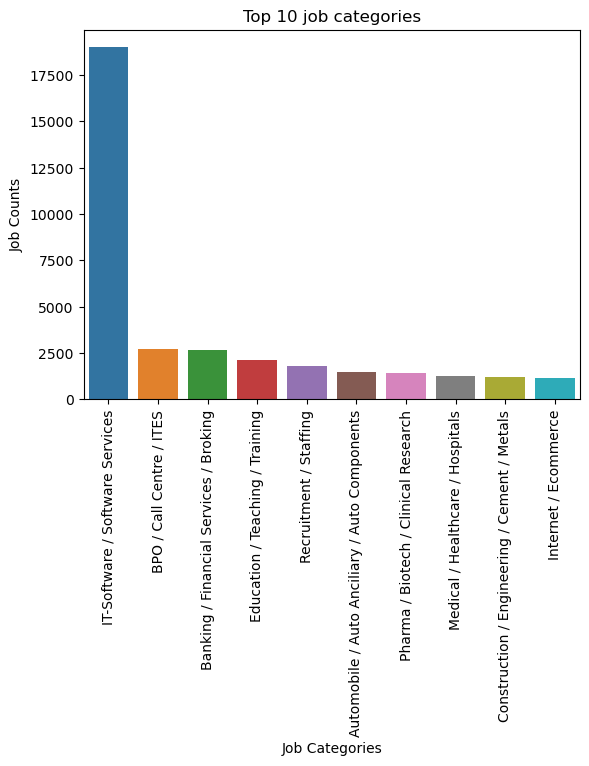

In [230]:
x = df2['industry'].value_counts().sort_values(ascending = False).head(10).index
y = df2['industry'].value_counts().sort_values(ascending = False).head(10).values
sns.barplot(x = x,y = y)
plt.xticks(rotation=90)
plt.xlabel('Job Categories')
plt.ylabel('Job Counts')
plt.title('Top 10 job categories')
plt.show()

In [231]:
category_counts = df2['industry'].value_counts().to_dict() #IT-Software / Software Services (18975) - category has the most common job
df2['job_category_counts'] = df2['industry'].map(category_counts) # Create a new column 'category_counts' using the counts

#category_counts = df2['industry'].value_counts().head(10) #for top 10 plt

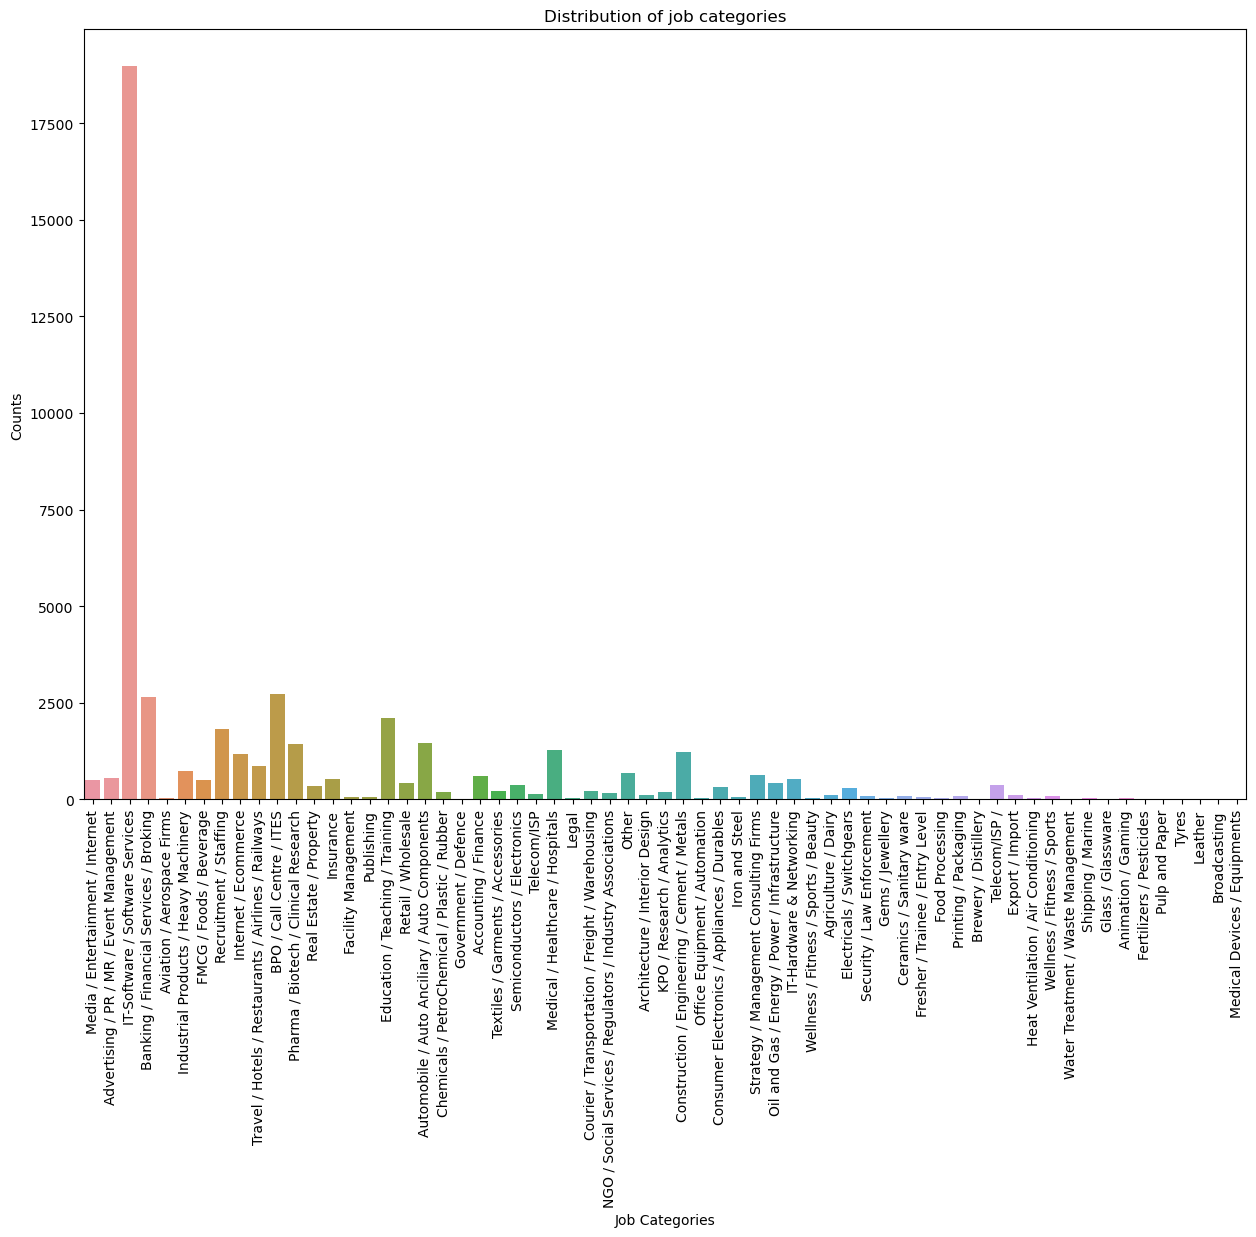

In [232]:
plt.figure(figsize=(15,10), dpi = 100)
sns.barplot(data= df2, x='industry', y='job_category_counts')
#plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Job Categories')
plt.ylabel('Counts')
plt.title('Distribution of job categories')
#plt.tight_layout()  # Ensure labels and titles fit within the figure
plt.show()

#### 3.	Location Analysis:
•	Which locations have the most job listings?<br>
•	Are there any locations with a high demand for specific job categories?<br>
•	Visualize the distribution of job listings by location.


In [233]:
job_loc_count = df2['joblocation_address'].value_counts().head(10)
print("Most Job listing Location:\n",job_loc_count)

Most Job listing Location:
 Bangalore     14519
Hyderabad      7163
NCR            6516
Mumbai         6316
Chennai        3360
Delhi          2628
Pune           1224
Kolkata         549
Ahmedabad       394
Chandigarh      184
Name: joblocation_address, dtype: int64


In [234]:
df2.pivot_table(index = 'joblocation_address', columns = 'industry', values = 'company', aggfunc = 'count').fillna(0)

industry             Accounting / Finance  \
joblocation_address                         
                                      0.0   
&                                     0.0   
(IndiaIA)                             0.0   
-                                     0.0   
Adilabad                              0.0   
...                                   ...   
palghar                               0.0   
pradesh                               0.0   
pune                                  0.0   
seoni                                 0.0   
thane                                 0.0   

industry             Advertising / PR / MR / Event Management  \
joblocation_address                                             
                                                          0.0   
&                                                         0.0   
(IndiaIA)                                                 0.0   
-                                                         0.0   
Adilabad                                                  0.0   
...                                                       ...   
palghar                                                   0.0   
pradesh                                                   0.0   
pune                                                      0.0   
seoni                                                     0.0   
thane                                                     0.0   

industry             Agriculture / Dairy  Animation / Gaming  \
joblocation_address                                            
                                     0.0                 0.0   
&                                    0.0                 0.0   
(IndiaIA)                            0.0                 0.0   
-                                    0.0                 0.0   
Adilabad                             0.0                 0.0   
...                                  ...                 ...   
palghar                              0.0                 0.0   
pradesh                              0.0                 0.0   
pune                                 0.0                 0.0   
seoni                                0.0                 0.0   
thane                                0.0                 0.0   

industry             Architecture / Interior Design  \
joblocation_address                                   
                                                0.0   
&                                               0.0   
(IndiaIA)                                       0.0   
-                                               0.0   
Adilabad                                        0.0   
...                                             ...   
palghar                                         0.0   
pradesh                                         0.0   
pune                                            0.0   
seoni                                           0.0   
thane                                           0.0   

industry             Automobile / Auto Anciliary / Auto Components  \
joblocation_address                                                  
                                                               0.0   
&                                                              0.0   
(IndiaIA)                                                      0.0   
-                                                              0.0   
Adilabad                                                       0.0   
...                                                            ...   
palghar                                                        0.0   
pradesh                                                        0.0   
pune                                                           0.0   
seoni                                                          0.0   
thane                                                          0.0   

industry             Aviation / Aerospace Firms  BPO / Call Centre / ITES  \
joblocation_address            

In [235]:
#Are there any locations with a high demand for specific job categories?

In [236]:
def get_top_industry_by_location(location):
    return df2[df2.joblocation_address == location].industry.value_counts().head(1).index[0]

In [244]:
top_industry_by_location_dict={location:get_top_industry_by_location(location) for location in df2.joblocation_address.unique()}
    top_industry_by_location_dict

{'Chennai': 'IT-Software / Software Services',
 'Bangalore': 'IT-Software / Software Services',
 'Mumbai': 'IT-Software / Software Services',
 'Kolkata': 'IT-Software / Software Services',
 'Coimbatore': 'IT-Software / Software Services',
 'Tamilnadu': 'Banking / Financial Services / Broking',
 'Delhi': 'IT-Software / Software Services',
 'NCR': 'IT-Software / Software Services',
 'Kochi': 'BPO / Call Centre / ITES',
 'Greater': 'IT-Software / Software Services',
 'Hyderabad': 'IT-Software / Software Services',
 'Kozhikode': 'Banking / Financial Services / Broking',
 'Lucknow': 'IT-Software / Software Services',
 'Tirupati': 'Medical / Healthcare / Hospitals',
 'Visakhapatnam': 'Pharma / Biotech / Clinical Research',
 'Ahmedabad': 'IT-Software / Software Services',
 'Pune': 'IT-Software / Software Services',
 'Canada': 'BPO / Call Centre / ITES',
 'Australia': 'IT-Software / Software Services',
 'Indore': 'IT-Software / Software Services',
 'Chandigarh': 'IT-Software / Software Service

In [245]:
df2.joblocation_address.nunique()

337

In [246]:
def get_top_5_industries_by_location(location):
    return df2[df2['joblocation_address'] == location].industry.value_counts().head(5)

In [247]:
get_top_5_industries_by_location('Bangalore')

IT-Software / Software Services           6922
Recruitment / Staffing                     757
BPO / Call Centre / ITES                   719
Banking / Financial Services / Broking     713
Internet / Ecommerce                       484
Name: industry, dtype: int64

Text(0.5, 1.0, 'Job locations')

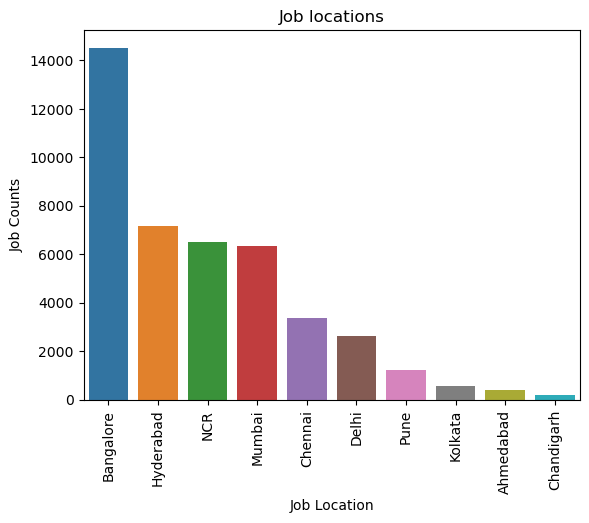

In [248]:
x = df2['joblocation_address'].value_counts().sort_values(ascending=False).head(10).index
y = df2['joblocation_address'].value_counts().sort_values(ascending=False).head(10).values
sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
plt.xlabel('Job Location')
plt.ylabel('Job Counts')
plt.title('Job locations')


In [249]:
#Just Another way of writing the code

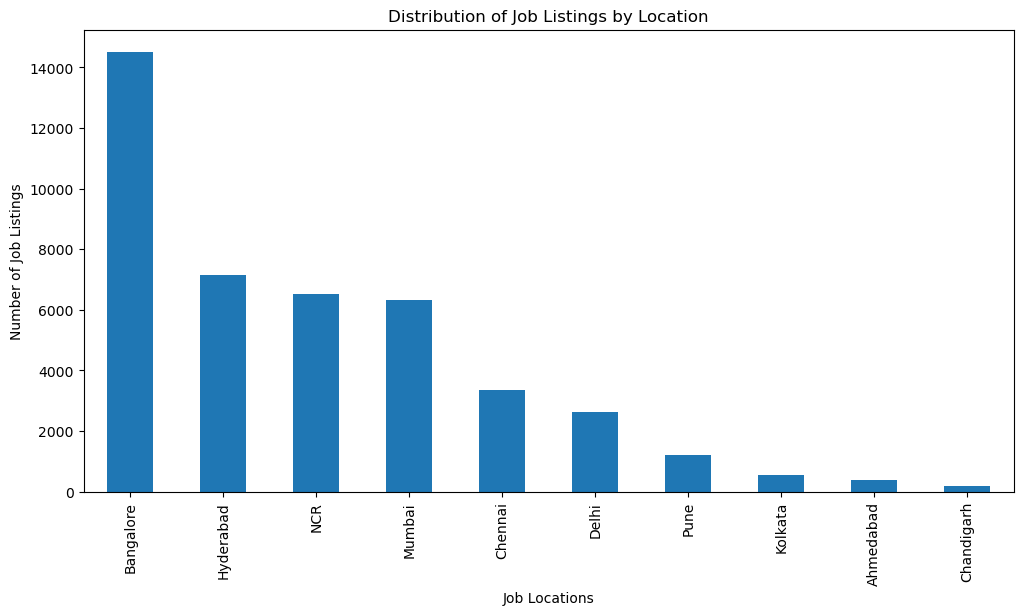

In [250]:
# Count the number of job listings for each location
location_counts = df2['joblocation_address'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar')
plt.xlabel('Job Locations')
plt.ylabel('Number of Job Listings')
plt.title('Distribution of Job Listings by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [355]:
def get_top_10_industries_by_location(location):
    return df2[df2['joblocation_address'] == location].industry.value_counts().head(10)

In [356]:
get_top_10_industries_by_location('Bangalore')

IT-Software / Software Services                  6922
Recruitment / Staffing                            757
BPO / Call Centre / ITES                          719
Banking / Financial Services / Broking            713
Internet / Ecommerce                              484
Education / Teaching / Training                   409
Pharma / Biotech / Clinical Research              400
Construction / Engineering / Cement / Metals      360
Automobile / Auto Anciliary / Auto Components     345
Medical / Healthcare / Hospitals                  301
Name: industry, dtype: int64

In [357]:
top_n_locations = 10
top_locations = df2['joblocation_address'].value_counts().head(top_n_locations).sort_values(ascending=False).index
top_locations

Index(['Bangalore', 'Hyderabad', 'NCR', 'Mumbai', 'Chennai', 'Delhi', 'Pune',
       'Kolkata', 'Ahmedabad', 'Chandigarh'],
      dtype='object')

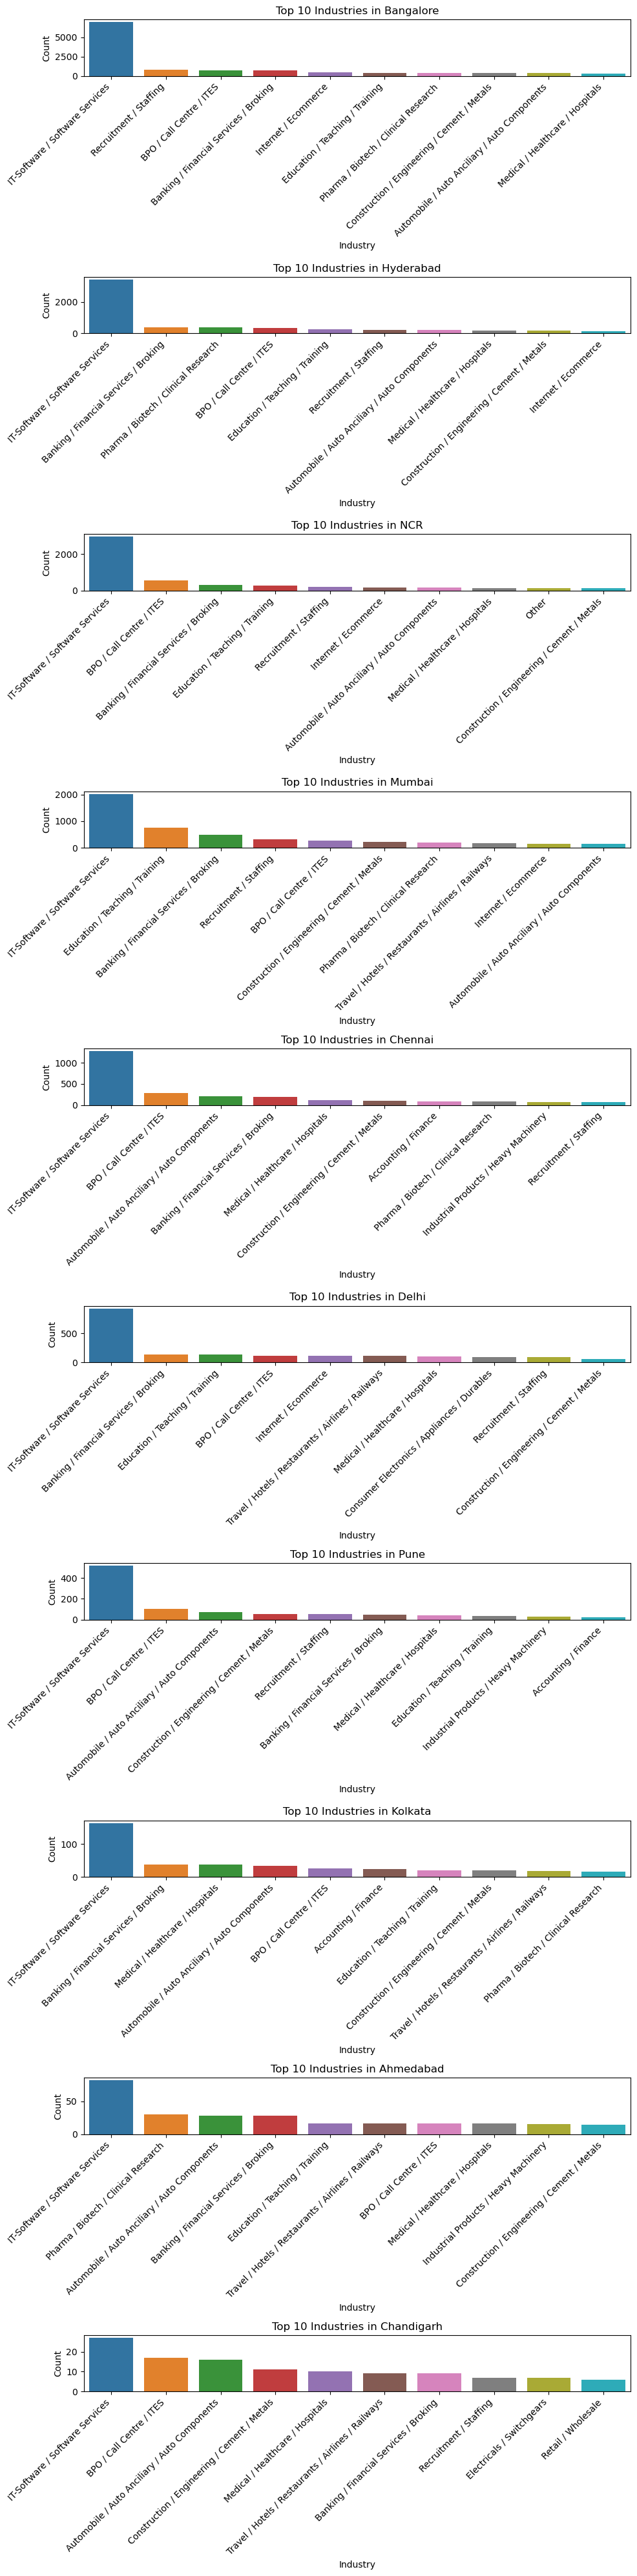

In [363]:
# Create subplots for the histograms based on the number of top locations
fig, axs = plt.subplots(len(top_locations), 1, figsize=(10, 4*len(top_locations)))

# Loop through the top locations
for i, loc in enumerate(top_locations):
    # Get the top 10 industries for the current location
    top_industries = get_top_10_industries_by_location(loc)
    
    # Create a histogram for the current location
    #axs[i].bar(top_industries.index, top_industries.values)
    #plt.xticks(rotation=90)
    # Use Seaborn to create a bar plot for the current location
    sns.barplot(x=top_industries.index, y=top_industries.values, ax=axs[i])
    
    axs[i].set_title(f'Top 10 Industries in {loc}')
    axs[i].set_xlabel('Industry')
    axs[i].set_ylabel('Count')
    
     # Rotate x-axis labels for better visibility
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)
    # Set the x-axis labels manually
    axs[i].set_xticklabels(top_industries.index, rotation=45, ha='right')
    
    
# Set the x-axis label for the bottom plot
#axs[-1].set_xlabel('Industry')

# Adjust spacing between subplots
plt.tight_layout()

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Show the histograms
plt.show()

In [ ]:
# Another Way to represent the data 

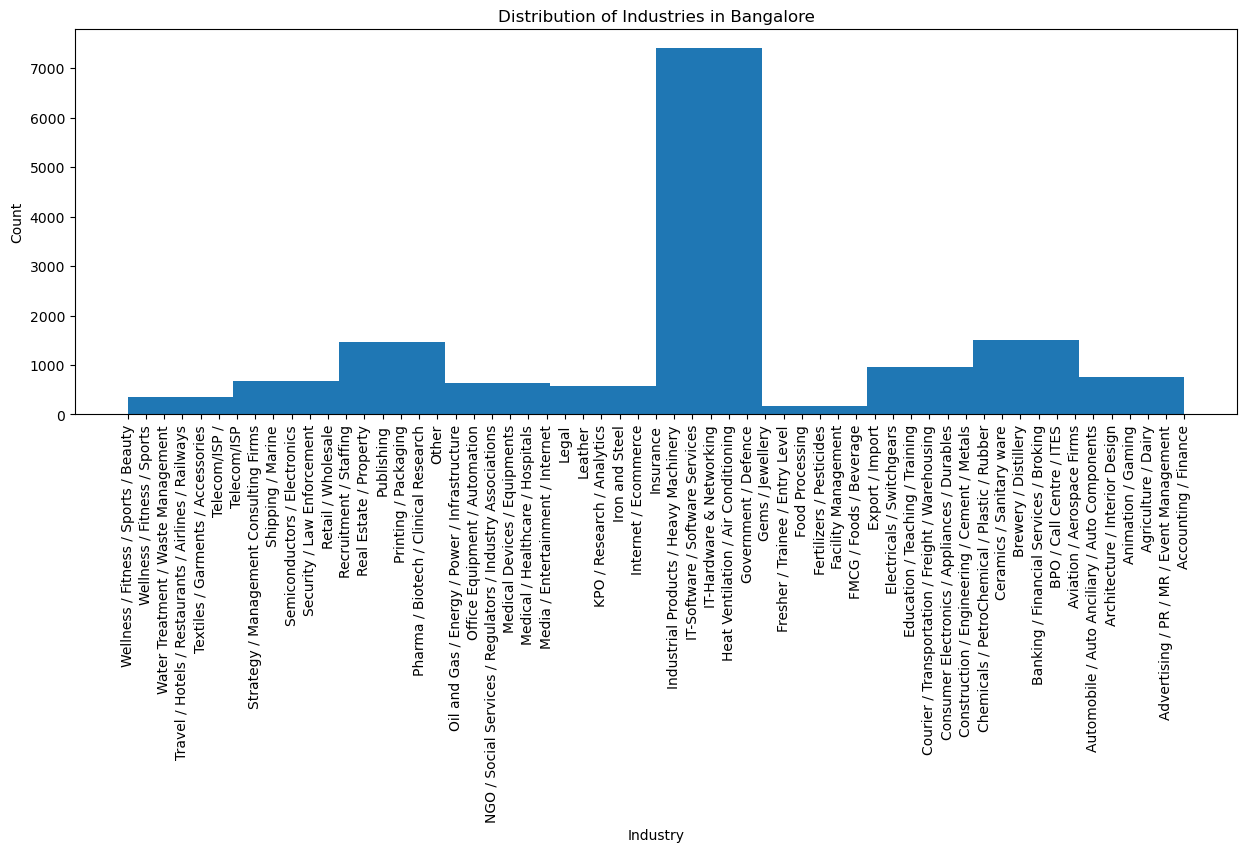

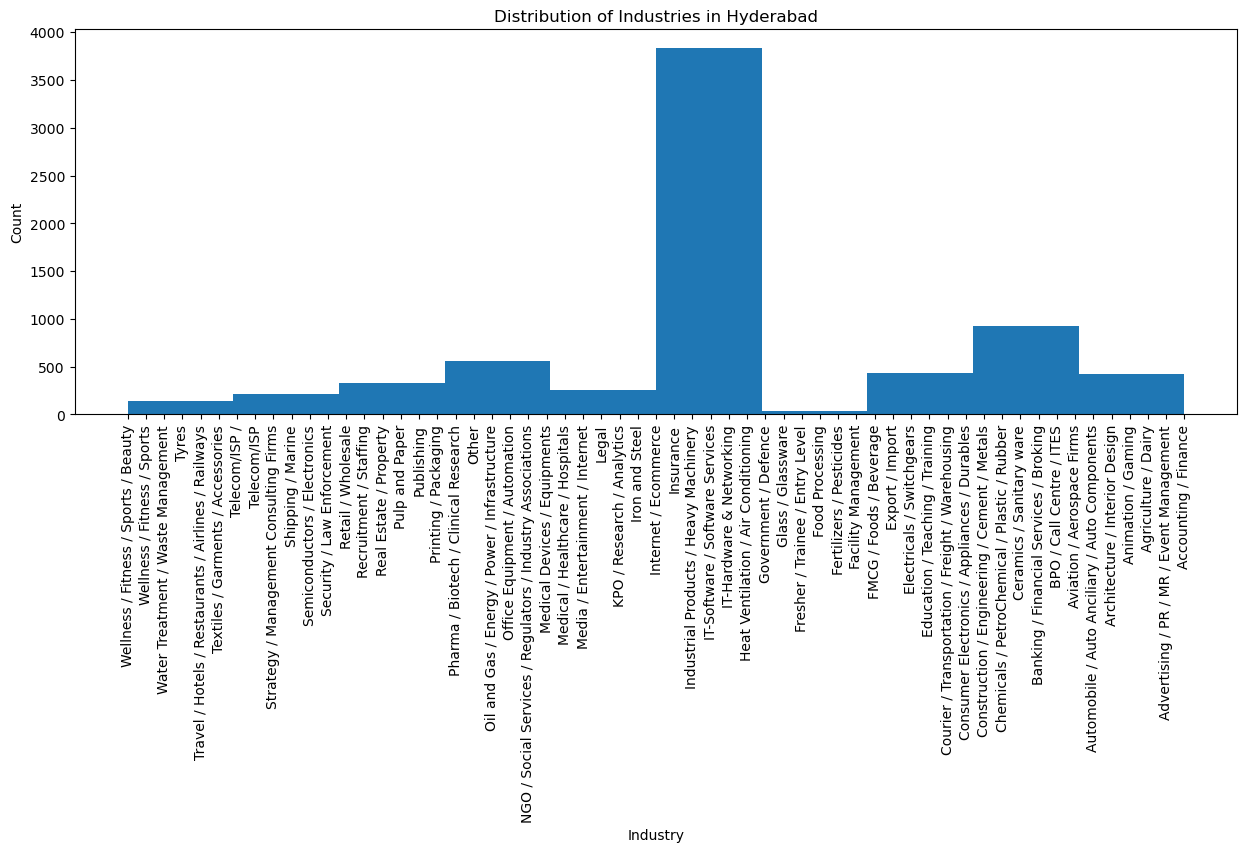

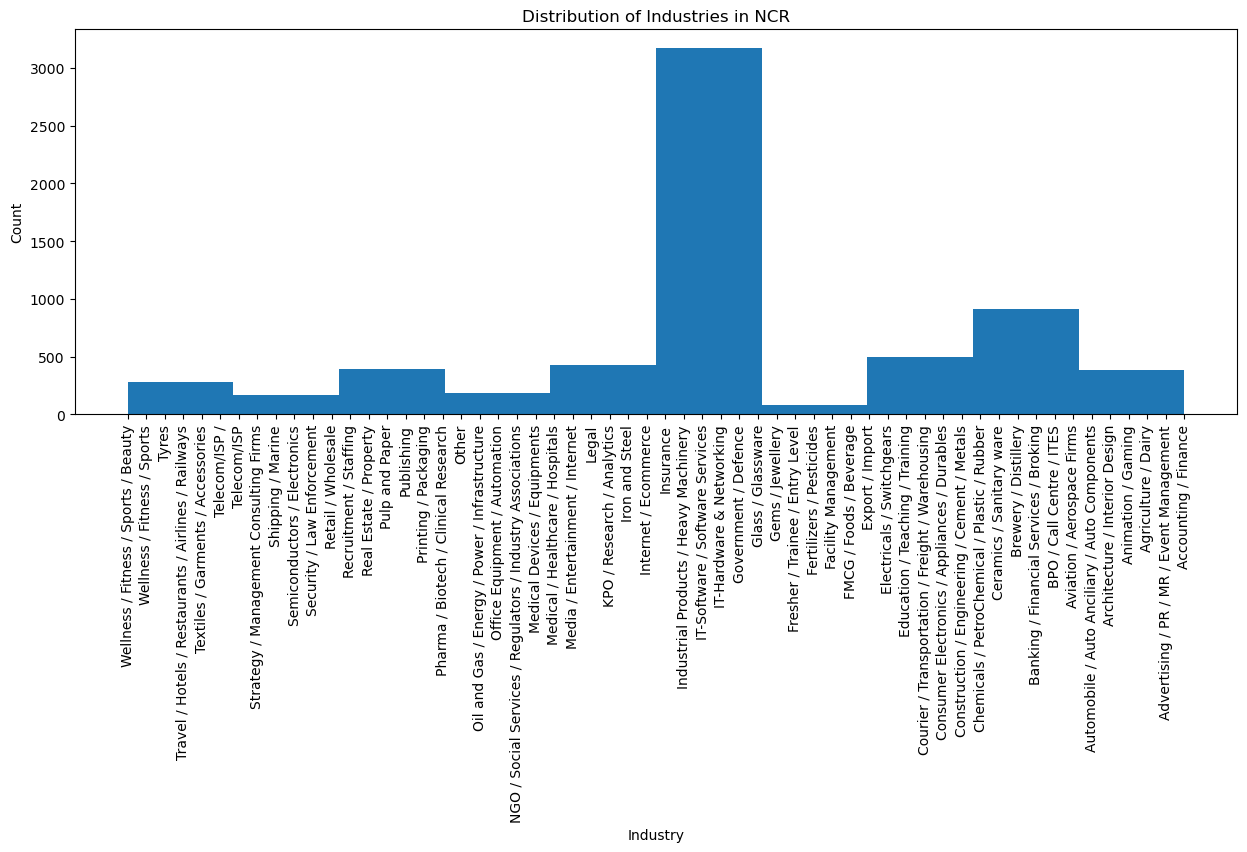

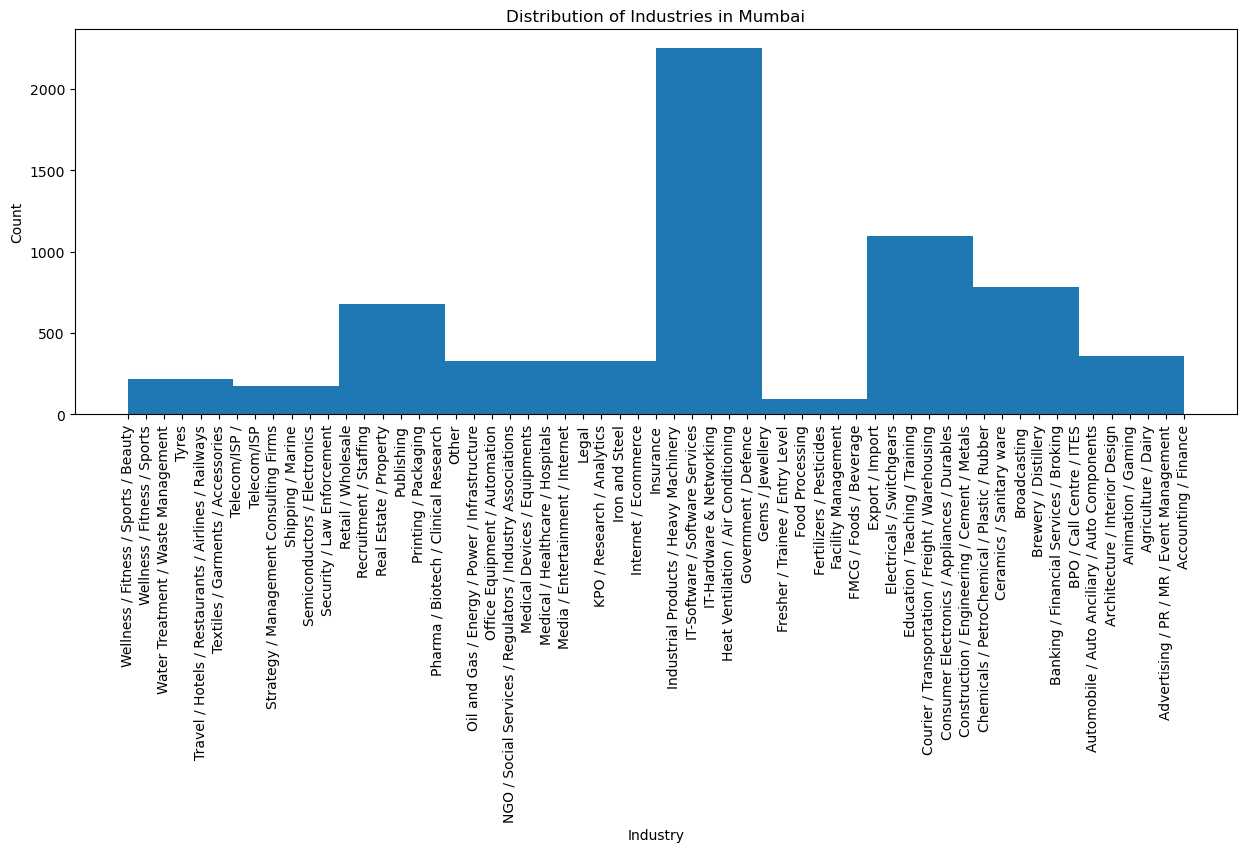

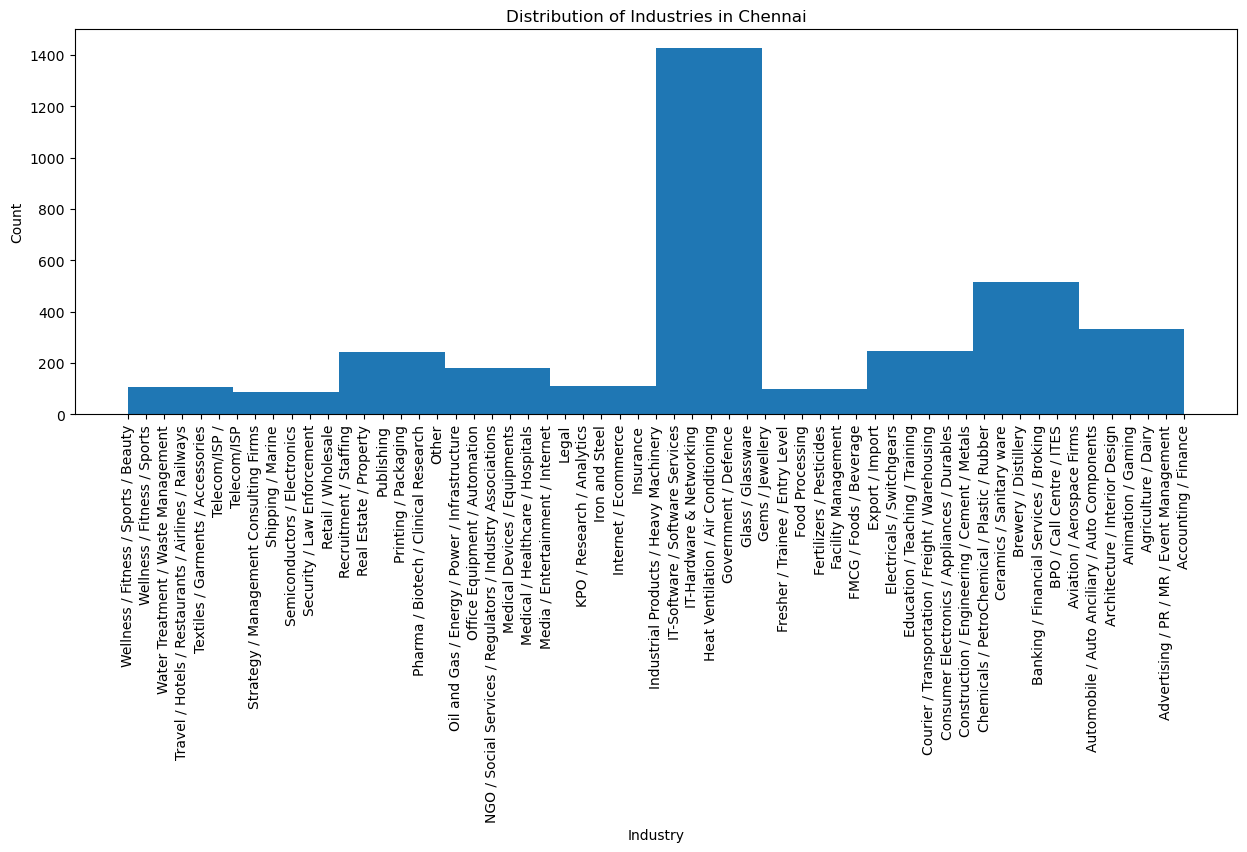

In [353]:
# Sort the data by job location address and industry
df2 = df2.sort_values(by=['joblocation_address', 'industry'], ascending=False)

# Get the top 5 locations
top_5_locations = df2['joblocation_address'].value_counts().index[:5].to_list()

# Get the top 10 industries in each location
top_10_industries_by_location = {}
for location in top_5_locations:
    top_10_industries_by_location[location] = df2[df2['joblocation_address'] == location]['industry'].value_counts().index[:20].to_list()
                                                                                        #index[:20].to_list()
# Create a histogram for each location
for location, industries in top_10_industries_by_location.items():
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=90)
    plt.hist(df2[df2['joblocation_address'] == location]['industry'])
    
    plt.xlabel('Industry')
    plt.ylabel('Count')
    plt.title('Distribution of Industries in {}'.format(location))
    plt.show()


#### 4.	Salary Information:
•	What is the salary distribution for various job categories?<br>
•	Are there any trends in salary based on experience or location?

In [361]:
# Here we are using df4. Since lot of salary data was not provided (more than 75%)we have deleted NaN and created separate 
# Datafame specifically for salary data analysis.

In [364]:
df4.shape

(11759, 11)

In [365]:
df4.columns

Index(['company', 'industry', 'joblocation_address', 'skills', 'exp_range',
       'exp_range_mean', 'min_exp', 'max_exp', 'sal_min', 'sal_max1',
       'salary_range'],
      dtype='object')

In [402]:
df4.isnull().sum()

company                0
industry               0
joblocation_address    0
skills                 0
exp_range              0
exp_range_mean         0
min_exp                0
max_exp                0
sal_min                0
sal_max1               0
salary_range           0
salary_avg             0
dtype: int64

In [367]:
df4['salary_range']

0          150000 - 225000
1          150000 - 250000
11         300000 - 650000
12         300000 - 650000
13         300000 - 650000
               ...        
46117    1500000 - 3000000
46118    1500000 - 3000000
46129     850000 - 1400000
46130     850000 - 1400000
46135    1200000 - 2200000
Name: salary_range, Length: 11759, dtype: object

In [377]:
#df4['salary_range'].apply(lambda x:x== 'None').sum()
df4['salary_range'].apply(lambda x: pd.isna(x) or x == 'None').sum()

0

In [386]:
# def convert_sal(sal_range):
#     min_sal, max_sal = map(int, sal_range.split(' - '))
#     return (min_sal + max_sal) / 2

# df4['salary_avg'] = df4['salary_range'].apply(convert_sal) #This gives an error 
#ValueError: invalid literal for int() with base 10: 'None' - Since there are None values, we can't take avg.
# -----------------------------------------------------------------------------------------------

def convert_sal(sal_range):
    try:
        min_sal, max_sal = map(int, sal_range.split(' - '))
        return (min_sal + max_sal) / 2
    except (ValueError, TypeError):
        print(f"Invalid value: {sal_range}")
        return None
    
df4['salary_avg'] = df4['salary_range'].apply(convert_sal)

Invalid value: 37400 - None
Invalid value: 15600 - None
Invalid value: 9300 - None
Invalid value: 437400 - None
Invalid value: 437400 - None
Invalid value: 315600 - None
Invalid value: 437400 - None
Invalid value: 437400 - None
Invalid value: 315600 - None
Invalid value: 315600 - None
Invalid value: 35600 - None
Invalid value: 437400 - None
Invalid value: 437400 - None
Invalid value: 35600 - None
Invalid value: 315600 - None
Invalid value: 437400 - None
Invalid value: 35600 - None
Invalid value: 437400 - None
Invalid value: 315600 - None
Invalid value: 315600 - None
Invalid value: 437400 - None
Invalid value: 315600 - None
Invalid value: 315600 - None
Invalid value: 437400 - None
Invalid value: 35600 - None
Invalid value: 437400 - None
Invalid value: 315600 - None
Invalid value: 315600 - None
Invalid value: 35600 - None
Invalid value: 315600 - None
Invalid value: 315600 - None
Invalid value: 35600 - None
Invalid value: 315600 - None
Invalid value: 315600 - None
Invalid value: 315600 - 

In [385]:
df4['salary_avg'].isnull().sum()

273

In [389]:
df4.dropna(subset=['salary_avg'], axis=0, inplace = True)

In [390]:
df4['salary_avg'].shape

(11486,)

In [391]:
df4['salary_avg'].isnull().sum()

0

In [400]:
df4['salary_avg'] = df4['salary_avg'].astype(int).astype(str)
# Remove decimal

In [401]:
df4['salary_avg']

0         187500
1         200000
11        475000
12        475000
13        475000
          ...   
46117    2250000
46118    2250000
46129    1125000
46130    1125000
46135    1700000
Name: salary_avg, Length: 11486, dtype: object

In [408]:
#errors='coerce' parameter will convert non-numeric values to NaN, which can be useful for handling missing or invld entries.
#df4['salary_avg'] = pd.to_numeric(df4['salary_avg'], errors='coerce')
df4['salary_avg'] = pd.to_numeric(df4['salary_avg'])

In [ ]:
# What is the salary distribution for various job categories?

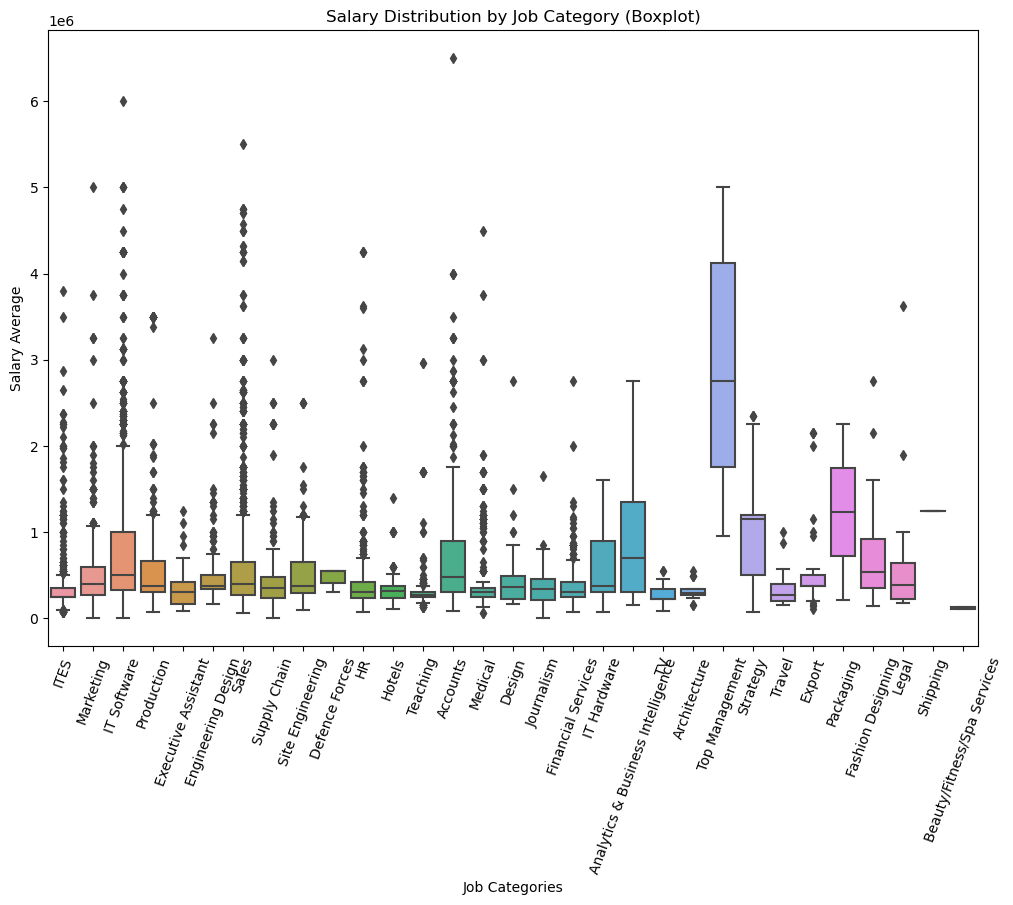

In [416]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df4, x = 'skills', y='salary_avg')
plt.xticks(rotation=70)
plt.xlabel('Job Categories')
plt.ylabel('Salary Average')
plt.title('Salary Distribution by Job Category (Boxplot)')
#plt.tight_layout()
plt.show()

In [500]:
#Since there are lot of Outliers, Find min, max, median salary for jobs
min_salary_dist = df4.groupby('skills')['salary_avg'].min()
max_salary_dist = df4.groupby('skills')['salary_avg'].max()
median_salary_dist = df4.groupby('skills')['salary_avg'].median()

Text(0.5, 1.0, 'Min Salary based on skills')

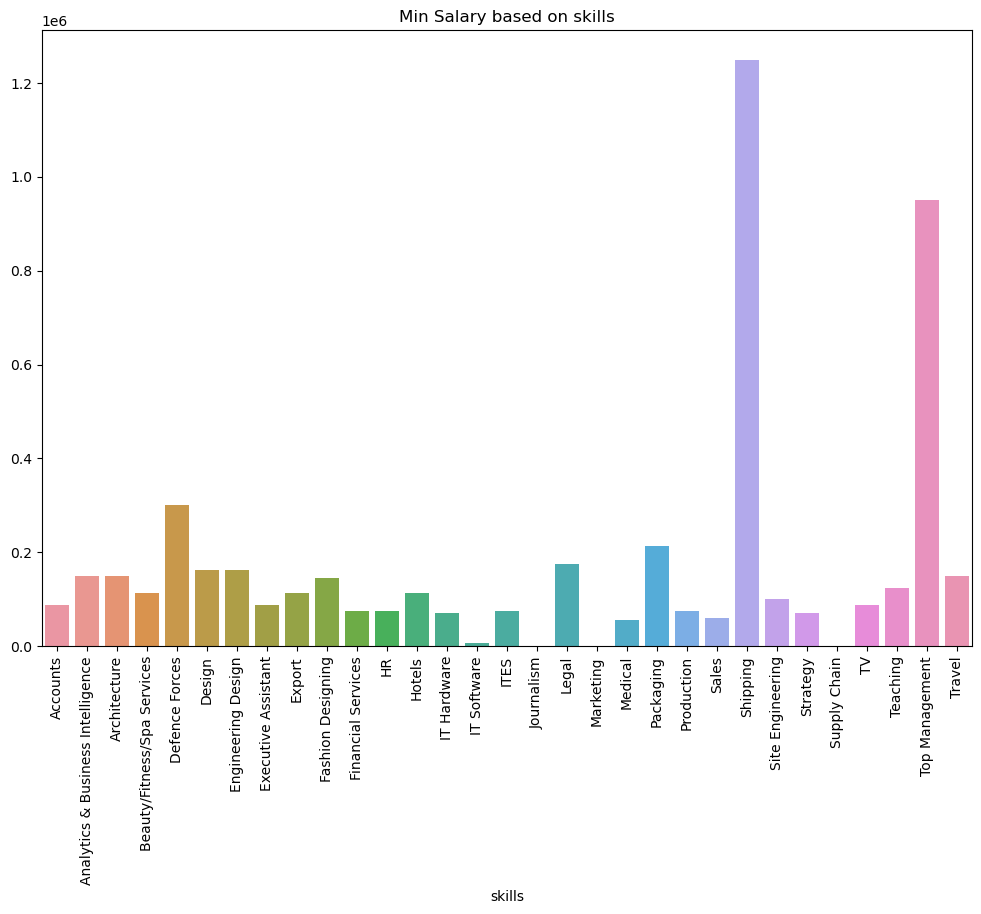

In [506]:
plt.figure(figsize=(12,8))
sns.barplot(x=min_salary_dist.index, y=min_salary_dist.values)
plt.xticks(rotation=90)
plt.title('Min Salary based on skills')

Text(0.5, 1.0, 'Max Salary based on skills')

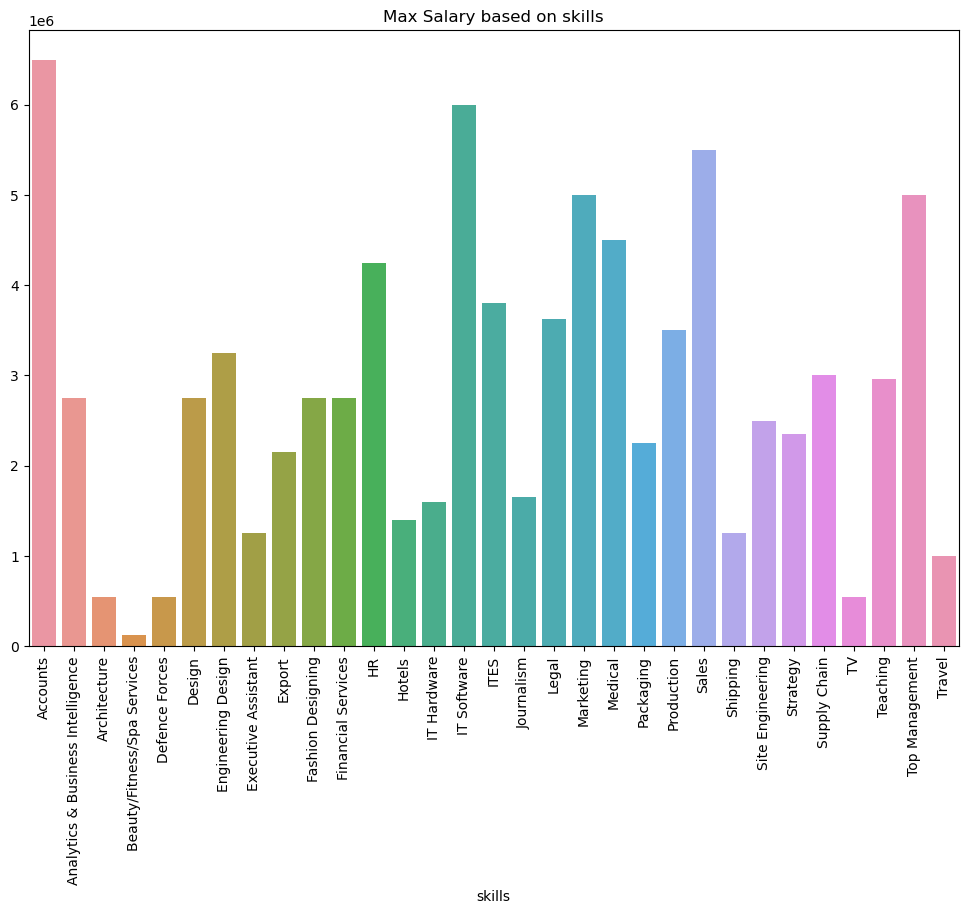

In [507]:
plt.figure(figsize=(12,8))
sns.barplot(x=max_salary_dist.index, y=max_salary_dist.values)
plt.xticks(rotation=90)
plt.title('Max Salary based on skills')

Text(0.5, 1.0, 'Median Salary based on skills')

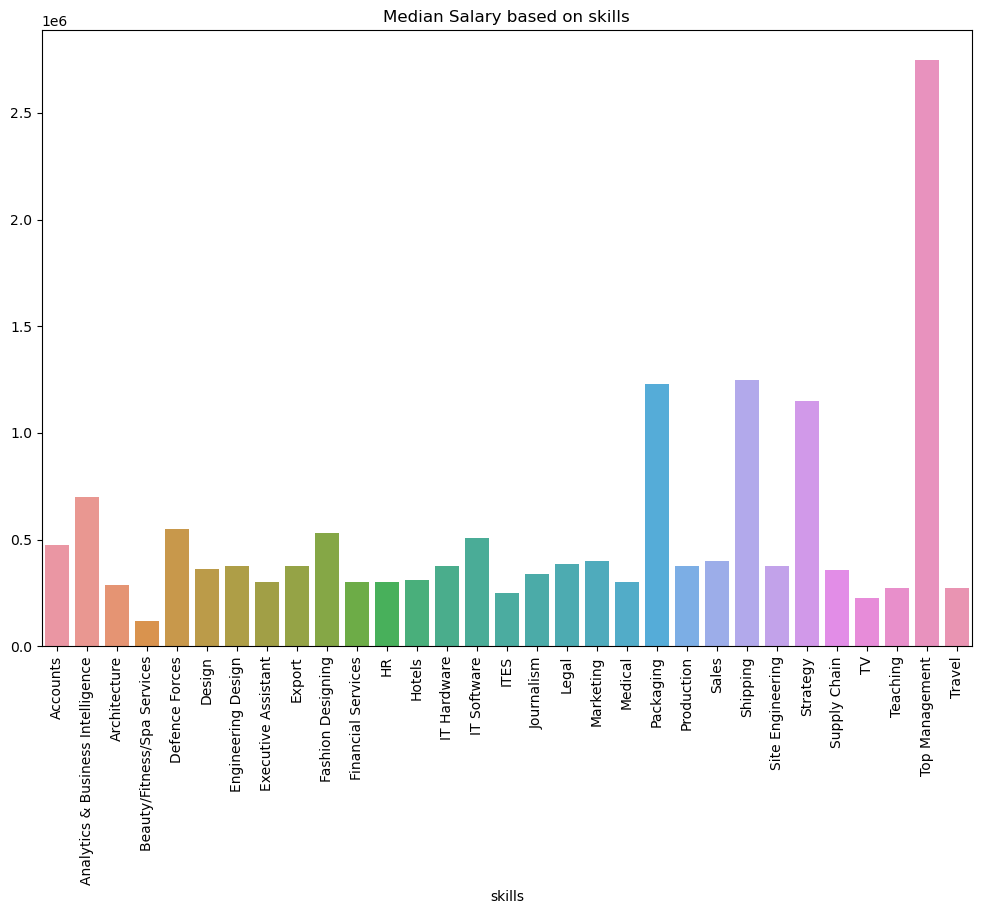

In [508]:
plt.figure(figsize=(12,8))
sns.barplot(x=median_salary_dist.index, y=median_salary_dist.values)
plt.xticks(rotation=90)
plt.title('Median Salary based on skills')

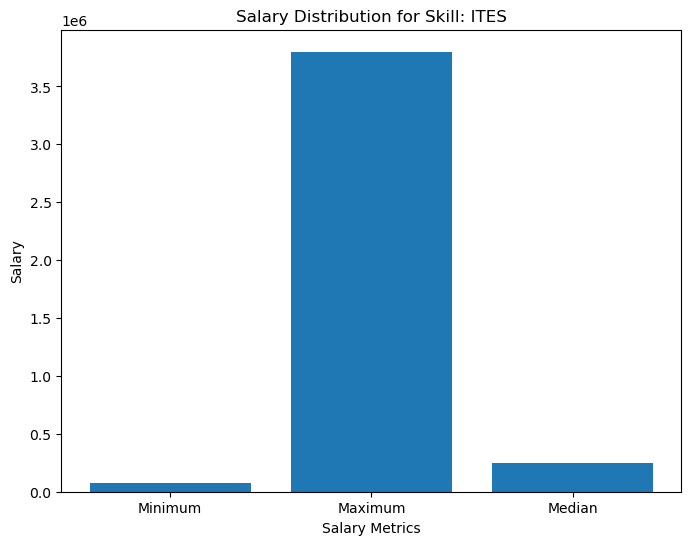

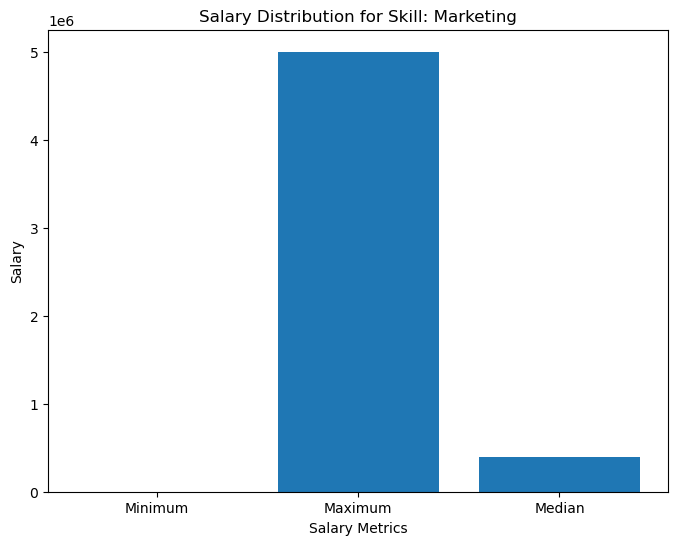

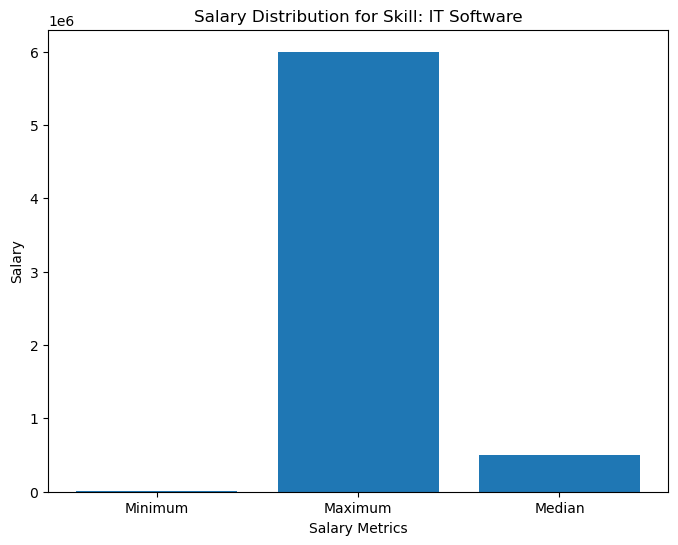

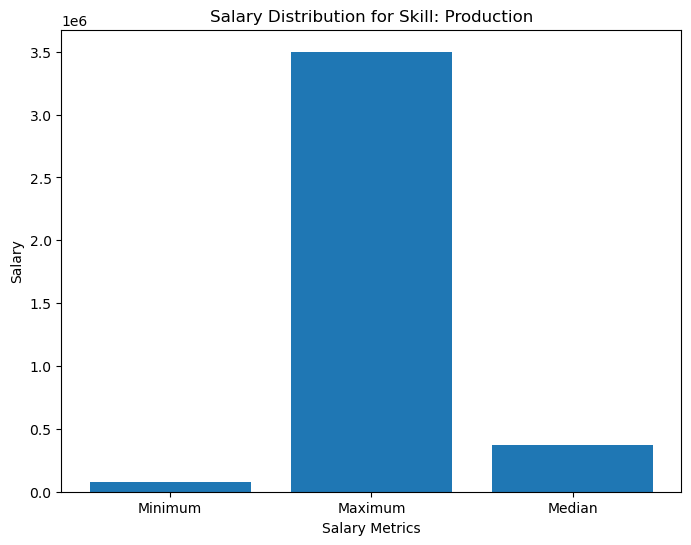

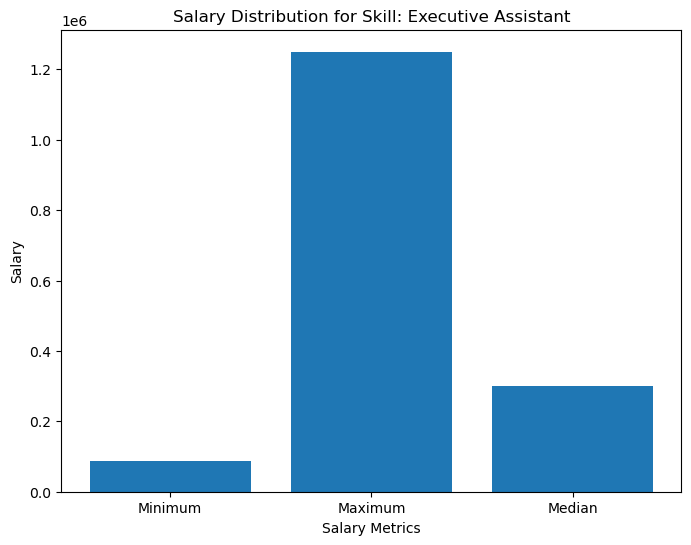

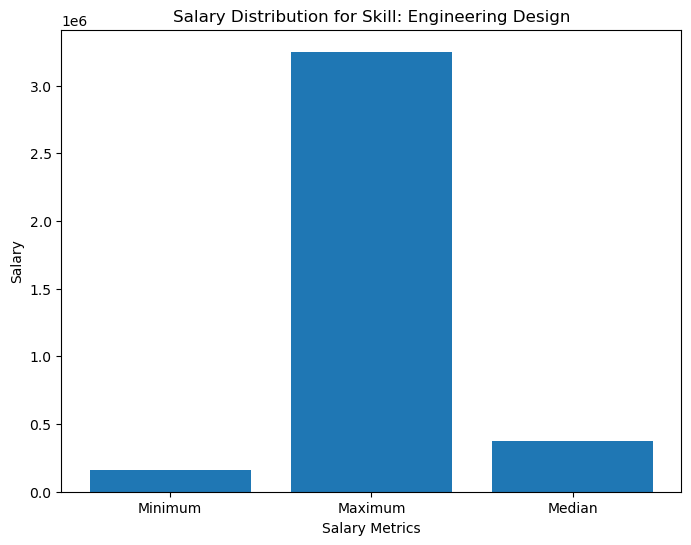

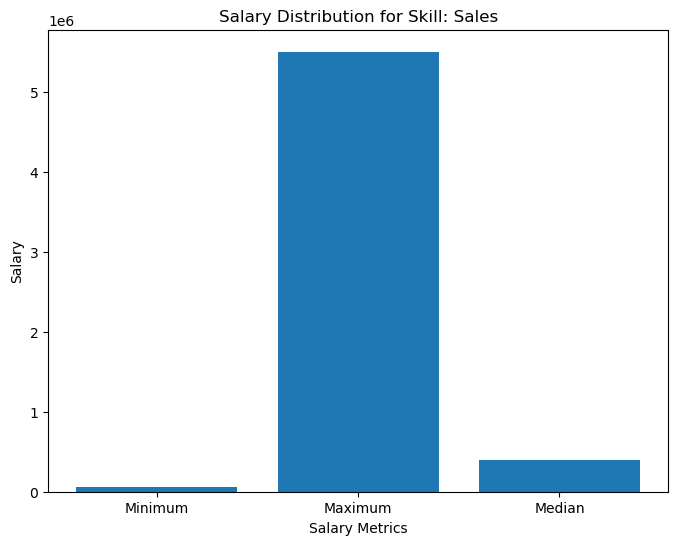

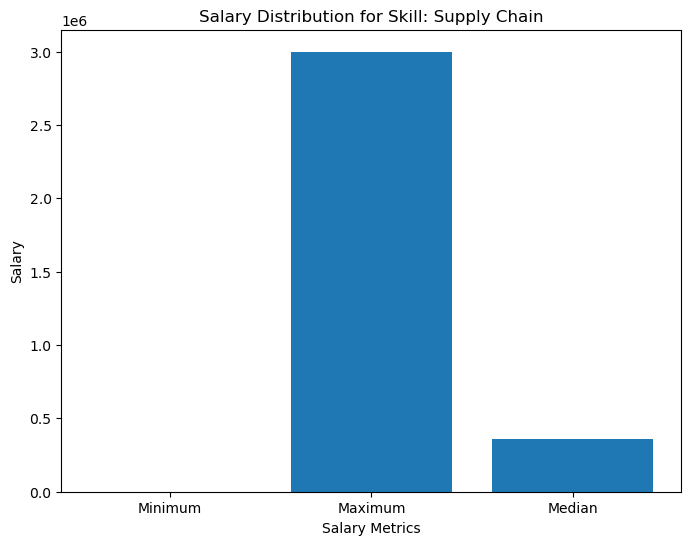

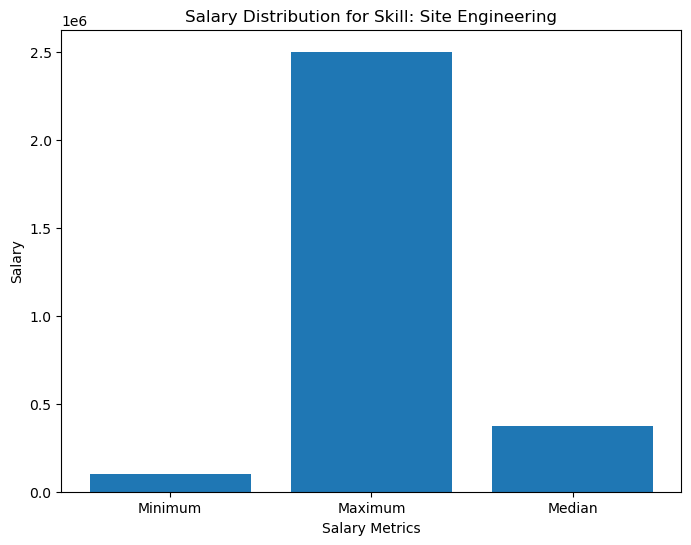

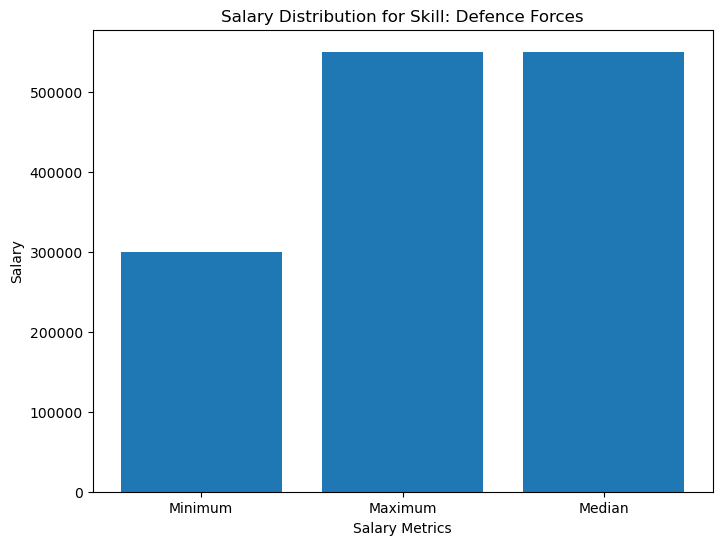

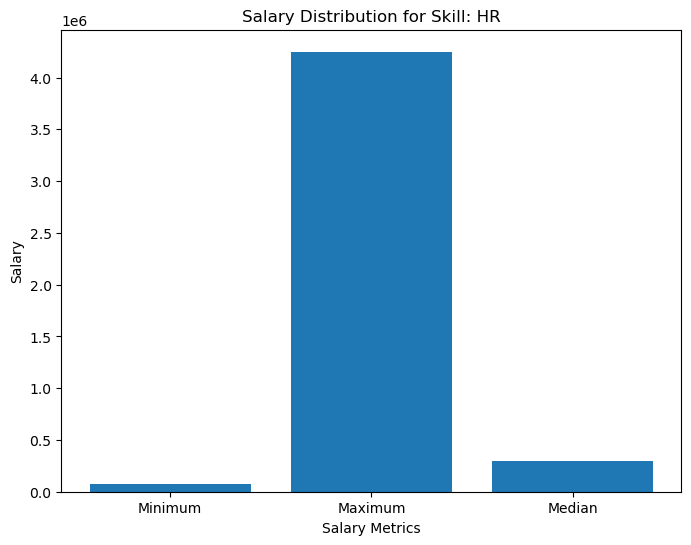

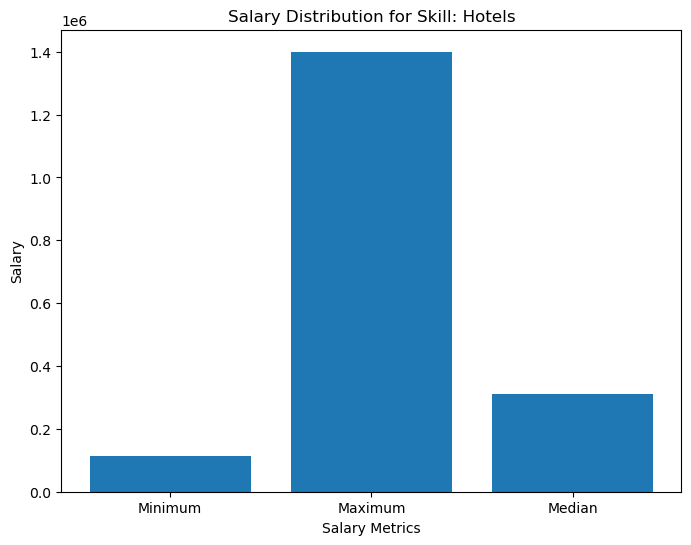

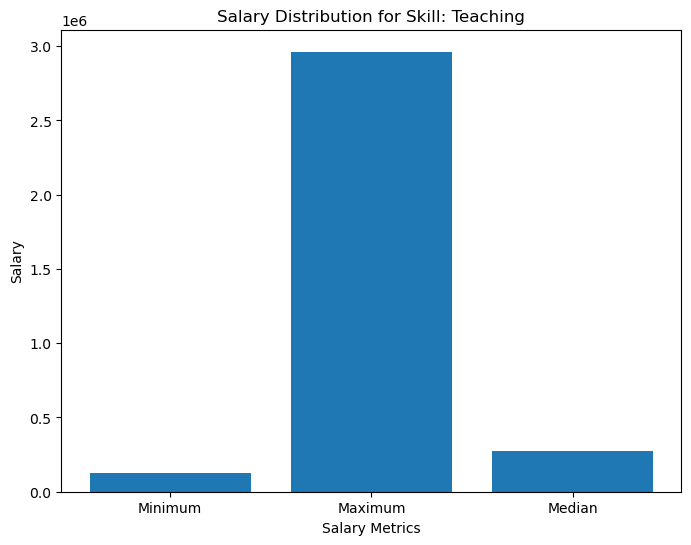

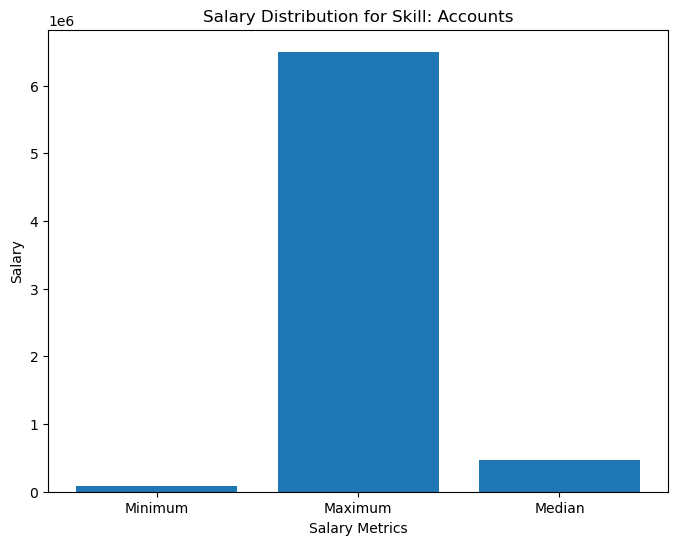

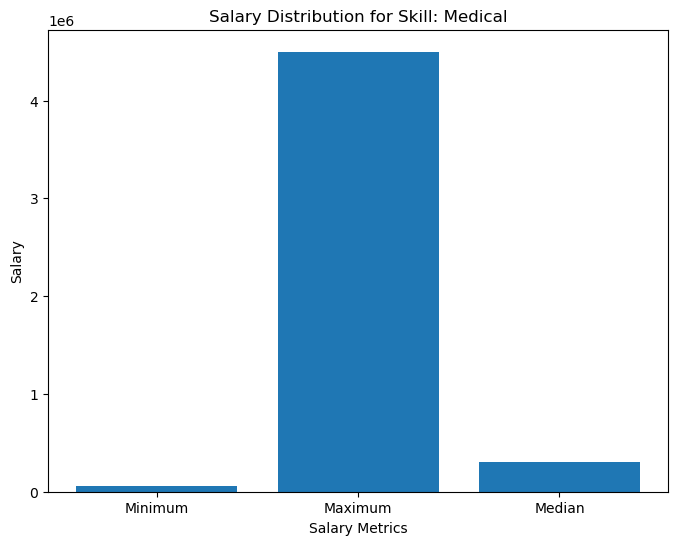

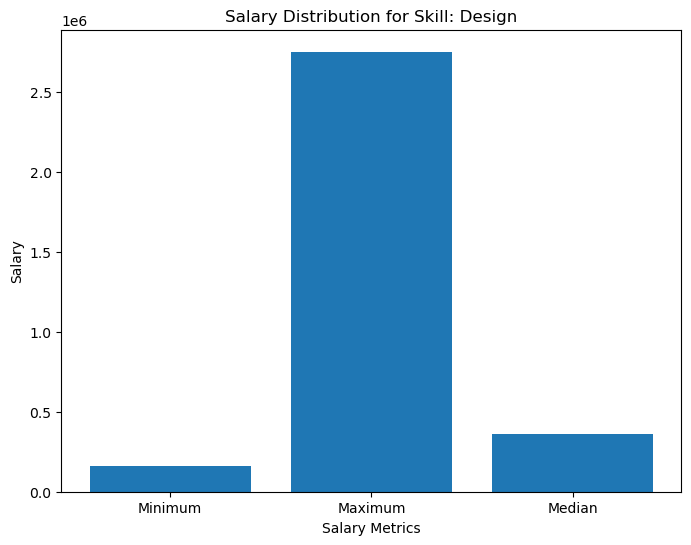

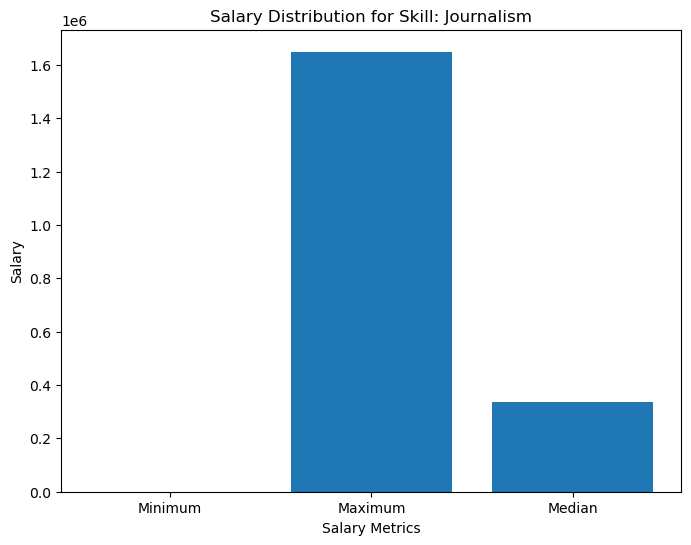

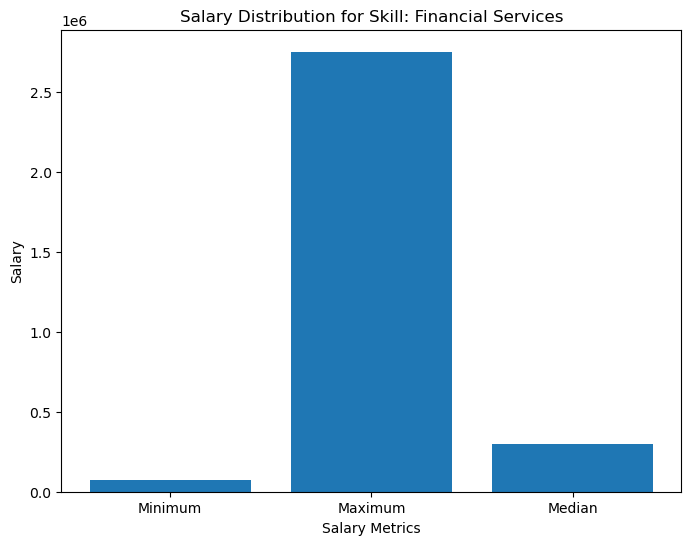

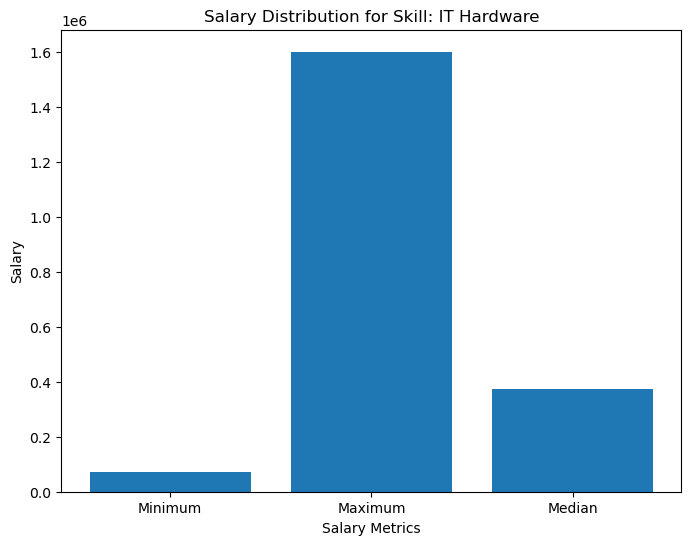

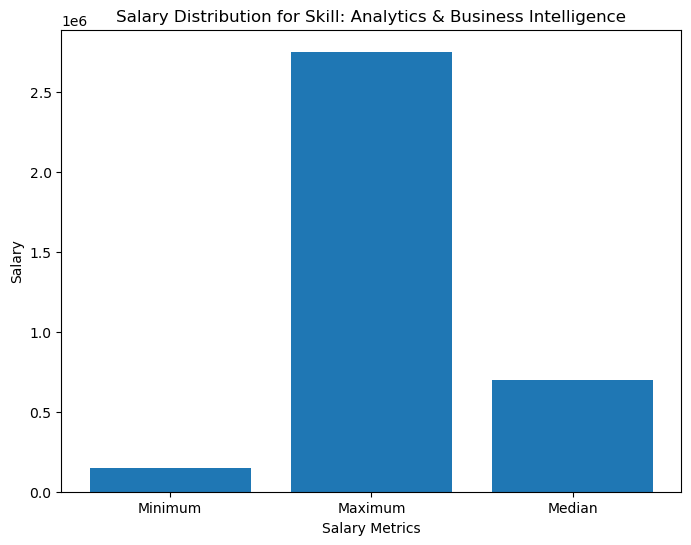

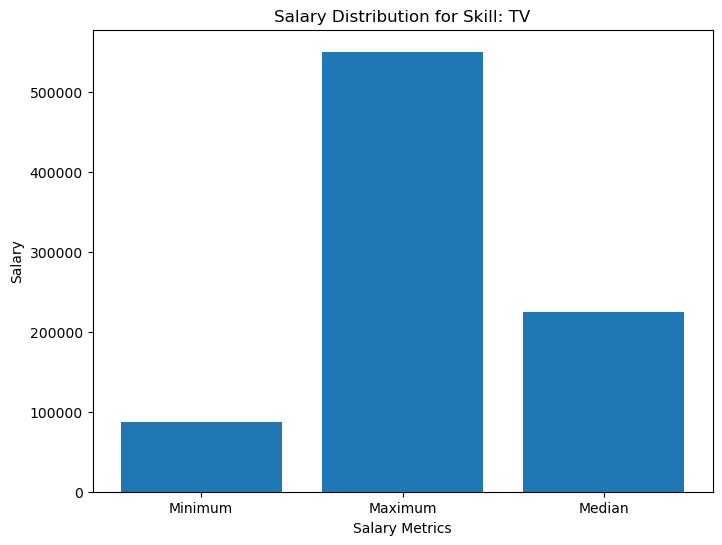

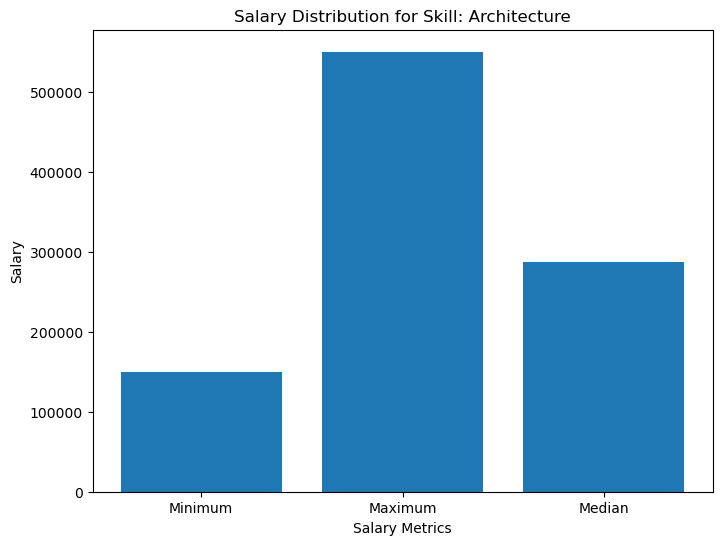

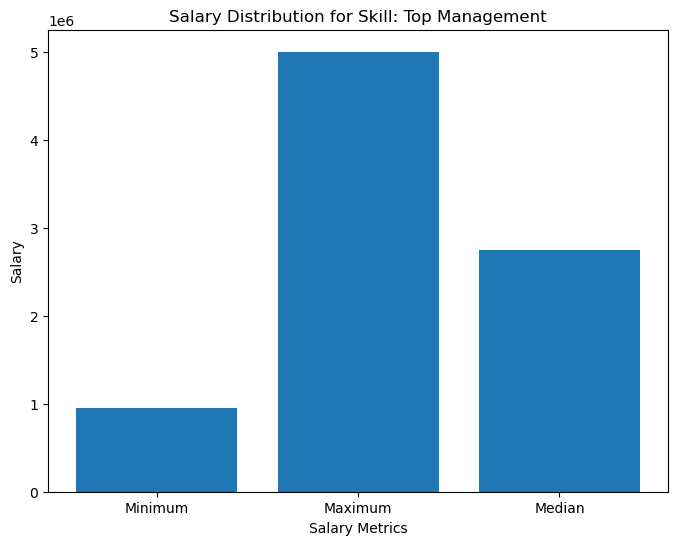

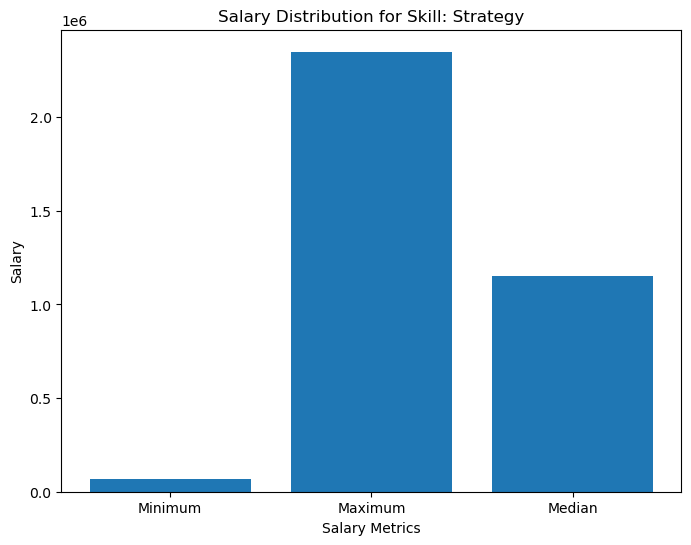

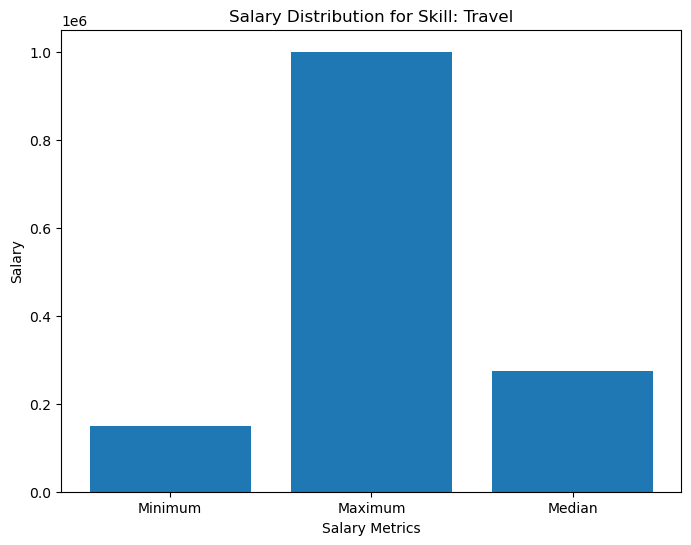

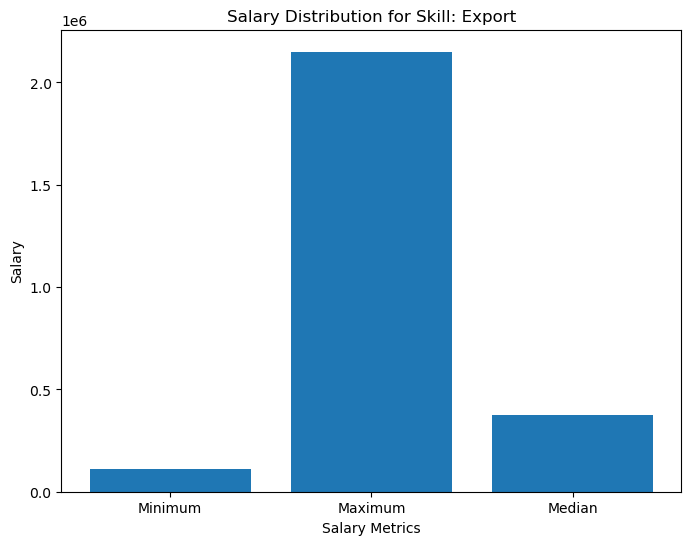

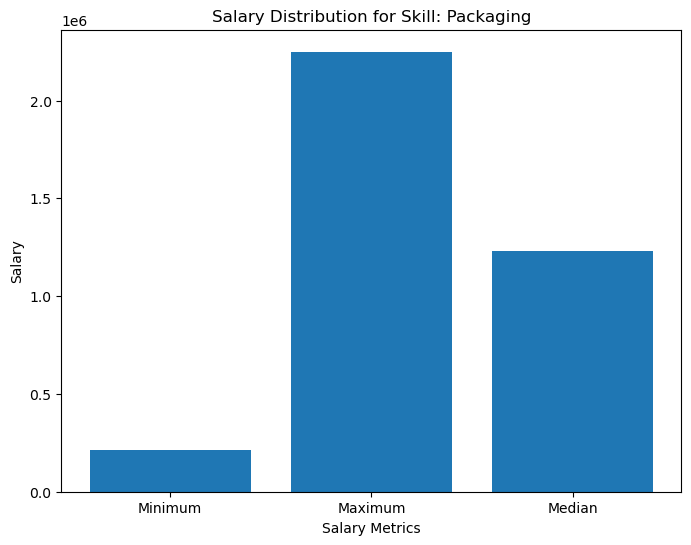

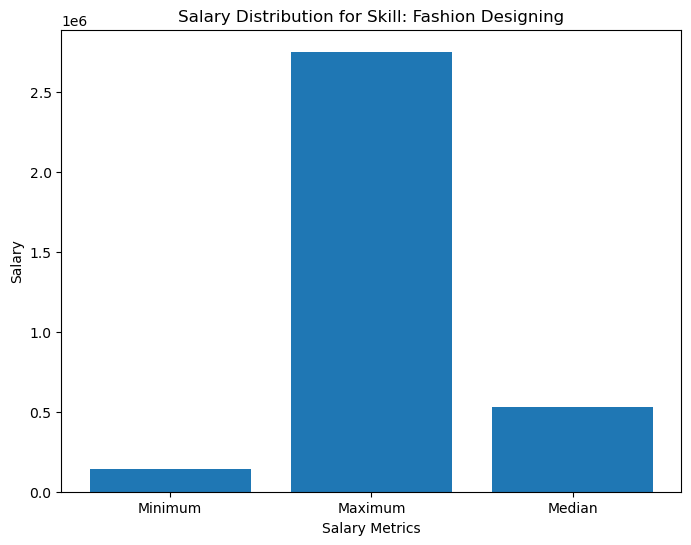

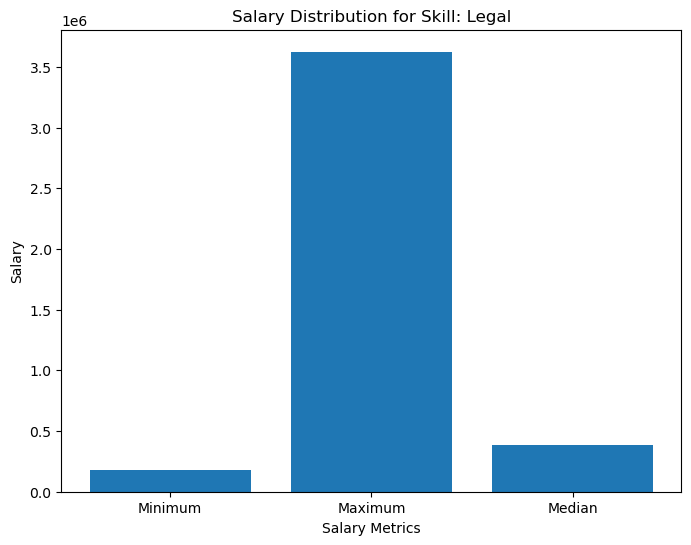

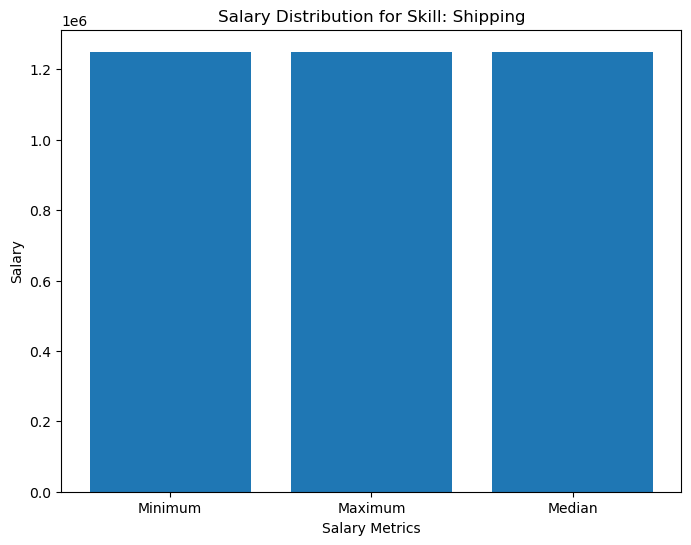

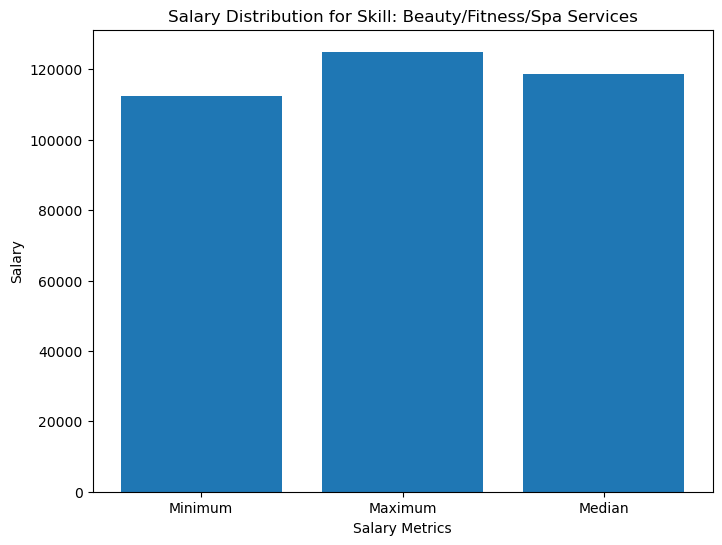

In [514]:
for skill in df4['skills'].unique():
    # Filter the DataFrame for the current skill category
    skill_df = df4[df4['skills'] == skill]
    
    # Calculate Minimum, Maximum, and Median salary for the current skill category
    min_salary = skill_df['salary_avg'].min()
    max_salary = skill_df['salary_avg'].max()
    median_salary = skill_df['salary_avg'].median()
    
    # Create a bar graph for the current skill category
    plt.figure(figsize=(8, 6))
    plt.bar(['Minimum', 'Maximum', 'Median'],[min_salary, max_salary, median_salary])
    plt.xlabel('Salary Metrics')
    plt.ylabel('Salary')
    plt.title(f'Salary Distribution for Skill: {skill}')
    plt.show()

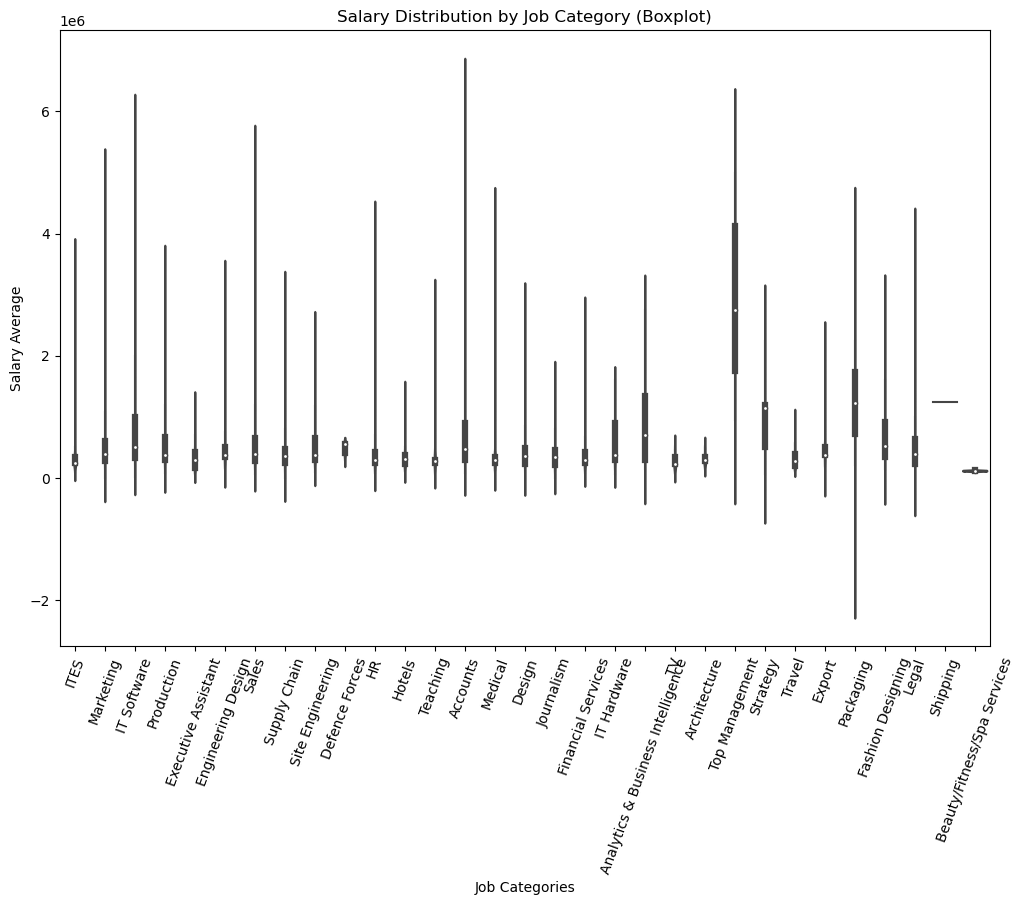

In [417]:
plt.figure(figsize=(12,8))
sns.violinplot(data = df4, x = 'skills', y='salary_avg')
plt.xticks(rotation=70)
plt.xlabel('Job Categories')
plt.ylabel('Salary Average')
plt.title('Salary Distribution by Job Category (Boxplot)')
#plt.tight_layout()
plt.show()

In [423]:
# Are there any trends in salary based on experience or location?

In [516]:
salary_by_exp = df4.groupby('exp_range_mean')['salary_avg'].median()
#print(salary_by_exp)
salary_by_location = df4.groupby('joblocation_address')['salary_avg'].median().sort_values(ascending=False).head(20)
#print(salary_by_location)

Text(0.5, 1.0, 'Salary by experience')

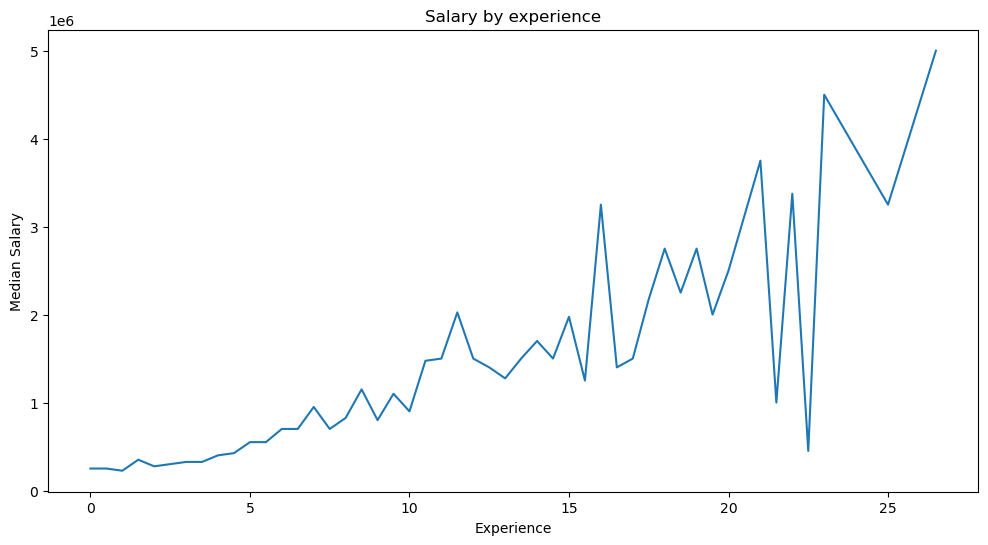

In [457]:
plt.figure(figsize = (12,6))
plt.plot(salary_by_exp.index,salary_by_exp.values)
plt.xlabel('Experience')
plt.ylabel('Median Salary')
plt.title('Salary by experience')

In [491]:
df4[(df4['exp_range_mean']>=22) &(df4['exp_range_mean']<=24)]

company  \
12126  Wednesday Coprorate Solutions India Pvt Ltd hi...   
13270  Kamms management Consultants hiring for Client...   
13271  Kamms management Consultants hiring for Client...   
13272  Kamms management Consultants hiring for Client...   
13659  Wednesday Coprorate Solutions India Pvt Ltd hi...   
14071  Doowon Automotive India PVT LTD hiring for Doo...   
30454  Techno - Commercial Consultancy Services hirin...   
36068                                   Apex Consultants   
43956  Harvas Management Solutions Pvt Ltd hiring for...   
44689                                       NMDC Limited   

                                            industry joblocation_address  \
12126  Automobile / Auto Anciliary / Auto Components             Chennai   
13270                        FMCG / Foods / Beverage                 NCR   
13271                        FMCG / Foods / Beverage              Mumbai   
13272                        FMCG / Foods / Beverage             Chennai   
13659  Automobile / Auto Anciliary / Auto Components             Chennai   
14071  Automobile / Auto Anciliary / Auto Components             Chennai   
30454  Automobile / Auto Anciliary / Auto Components                 NCR   
36068  Oil and Gas / Energy / Power / Infrastructure              Mumbai   
43956           Pharma / Biotech / Clinical Research           Hyderabad   
44689                                 Iron and Steel           Hyderabad   

                   skills exp_range  exp_range_mean min_exp max_exp  sal_min  \
12126         IT Software   20 - 25            22.5     20       25   400000   
13270      Top Management   18 - 28            23.0     18       28  4000000   
13271      Top Management   18 - 28            23.0     18       28  4000000   
13272      Top Management   18 - 28            23.0     18       28  4000000   
13659         IT Software   20 - 25            22.5     20       25   300000   
14071                  HR   20 - 25            22.5     20       25   750000   
30454  Engineering Design   18 - 28            23.0     18       28  3000000   
36068      Top Management   20 - 25            22.5     20       25  3500000   
43956          Production   17 - 27            22.0     17       27  3000000   
44689            Accounts   20 - 25            22.5     20       25    51300   

      sal_max1       salary_range  salary_avg  
12126   500000    400000 - 500000      450000  
13270  5000000  4000000 - 5000000     4500000  
13271  5000000  4000000 - 5000000     4500000  
13272  5000000  4000000 - 5000000     4500000  
13659   400000    300000 - 400000      350000  
14071   800000    750000 - 800000      775000  
30454  3500000  3000000 - 3500000     3250000  
36068  4500000  3500000 - 4500000     4000000  
43956  3750000  3000000 - 3750000     3375000  
44689   373000     51300 - 373000      212150

In [478]:
#salary_by_exp.plot(kind='bar', title='Median Salary by experience')

In [481]:
#sns.boxplot(x='exp_range_mean', y='salary_avg', data=df4)

In [483]:
# salary_pivot=df4.pivot_table(index='exp_range_mean', columns='joblocation_address', values='salary_avg', aggfunc='median')
# sns.heatmap(salary_pivot, cmap='coolwarm')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Indonesia'),
  Text(2, 0, 'Bangladesh'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Malaysia'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'Kollam'),
  Text(7, 0, 'Karimnagar'),
  Text(8, 0, 'Dhanbad'),
  Text(9, 0, 'Aurangabad'),
  Text(10, 0, 'Neemrana'),
  Text(11, 0, 'Manesar'),
  Text(12, 0, 'Bawal'),
  Text(13, 0, 'Baddi'),
  Text(14, 0, 'Ahmednagar'),
  Text(15, 0, 'Mauritius'),
  Text(16, 0, 'Mathura'),
  Text(17, 0, 'Arabia'),
  Text(18, 0, 'Saudi'),
  Text(19, 0, 'Ajmer')])

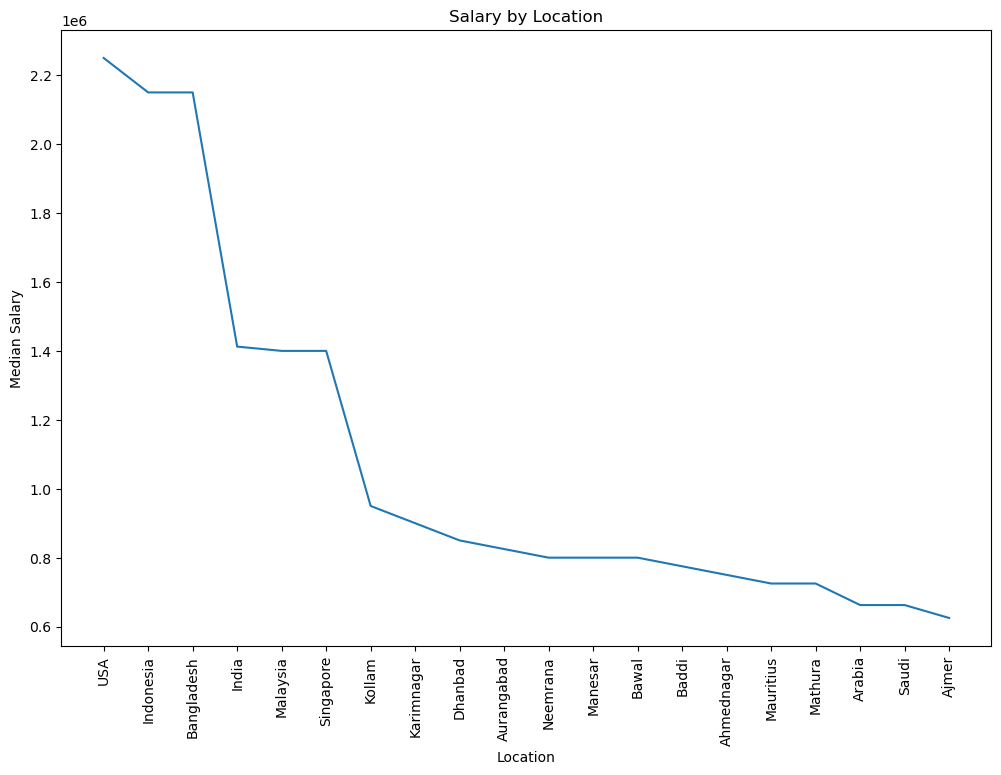

In [470]:
plt.figure(figsize = (12,8))
plt.plot(salary_by_location.index,salary_by_location.values)
plt.xlabel('Location')
plt.ylabel('Median Salary')
plt.title('Salary by Location')
plt.xticks(rotation=90)

<Axes: title={'center': 'Median Salary by Location'}, xlabel='joblocation_address'>

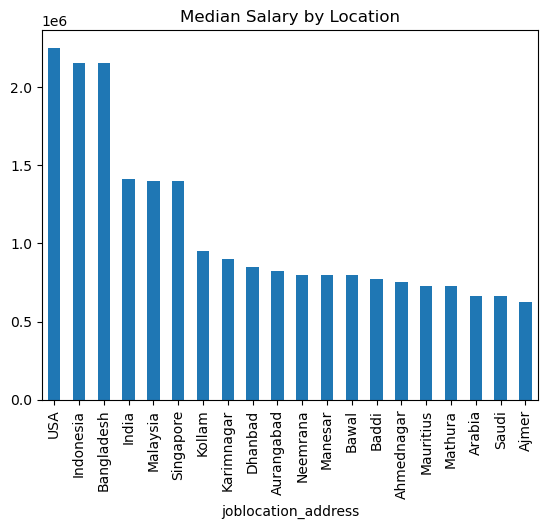

In [475]:
salary_by_location.plot(kind='bar', title='Median Salary by Location')

#### 5.	Experience and Skills:
•	What is the distribution of job listings based on required experience levels?<br>
•	Analyze the relationship between experience and salary.


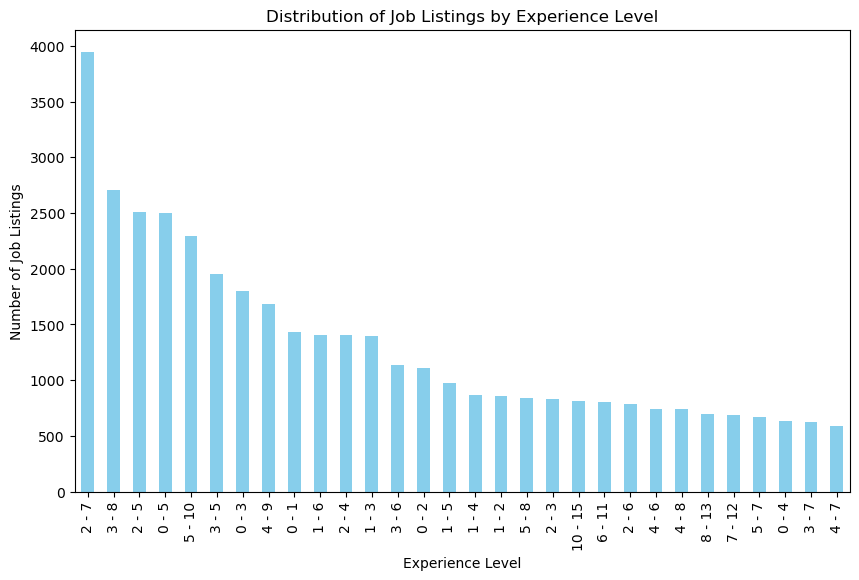

In [521]:
# Group the data by experience level and count the number of listings in each group
experience_counts = df2['exp_range'].value_counts().head(30)

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Listings')
plt.title('Distribution of Job Listings by Experience Level')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()


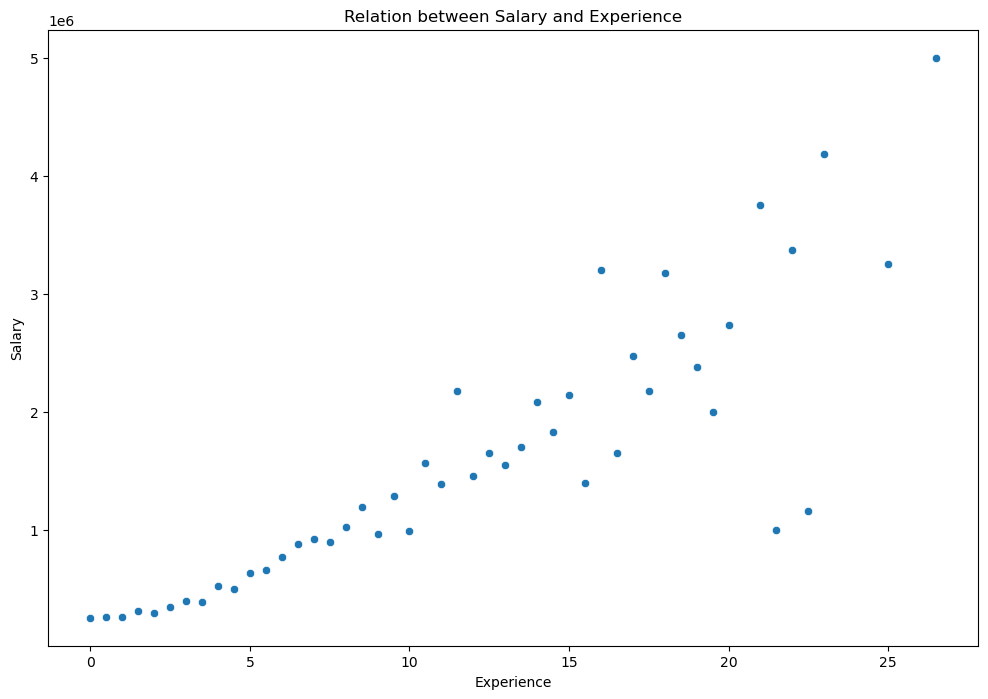

In [553]:
# Analyze the relationship between experience and salary.
mean_salary_by_experience = df4.groupby('exp_range_mean')['salary_avg'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.scatterplot(data =mean_salary_by_experience, x='exp_range_mean', y='salary_avg')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Relation between Salary and Experience')
plt.show()

#### 6.	Company Analysis:
•	Which companies have the most job listings?<br>
•	Visualize the distribution of job listings by company.


In [571]:
#Company with most job openong for top skill
df2.groupby('company')['skills'].value_counts().sort_values(ascending=False).head(50)

company                                                                            skills            
YOGAM BPO                                                                          ITES                  584
Indian Institute of Technology Bombay                                              Teaching              402
Confidential                                                                       IT Software           310
Unitforce technologies Pvt. Ltd.                                                   IT Software           292
Oracle India Pvt. Ltd.                                                             IT Software           284
Axis Jobs                                                                          Production            249
Ikya Human Capital Solutions Pvt Ltd                                               IT Software           242
BVR People Consulting                                                              Production            236
Gratitude India           

In [575]:
top_skills_by_company = df2.groupby(['company', 'skills'])['skills'].count().reset_index(name='count')
top_skills_by_company = top_skills_by_company.sort_values(by='count', ascending=False).head(5)
top_skills_by_company

company       skills  count
11253                              YOGAM BPO         ITES    584
4887   Indian Institute of Technology Bombay     Teaching    402
2315                            Confidential  IT Software    310
10585       Unitforce technologies Pvt. Ltd.  IT Software    292
7209                  Oracle India Pvt. Ltd.  IT Software    284

In [564]:
# Which companies have the most job listings?
df2['company'].value_counts()

Axis Jobs                                     946
YOGAM BPO                                     656
Confidential                                  559
Indian Institute of Technology Bombay         402
Oracle India Pvt. Ltd.                        319
                                             ... 
DeStudio                                        1
Interlock Industries, Inc.                      1
PROUD TECHNOLOGIES PVT. LTD                     1
Rasandik Engineering Industries India Ltd.      1
ISG NovaSoft Technologies Limited               1
Name: company, Length: 8469, dtype: int64

In [557]:
# Visualize the distribution of job listings by company.

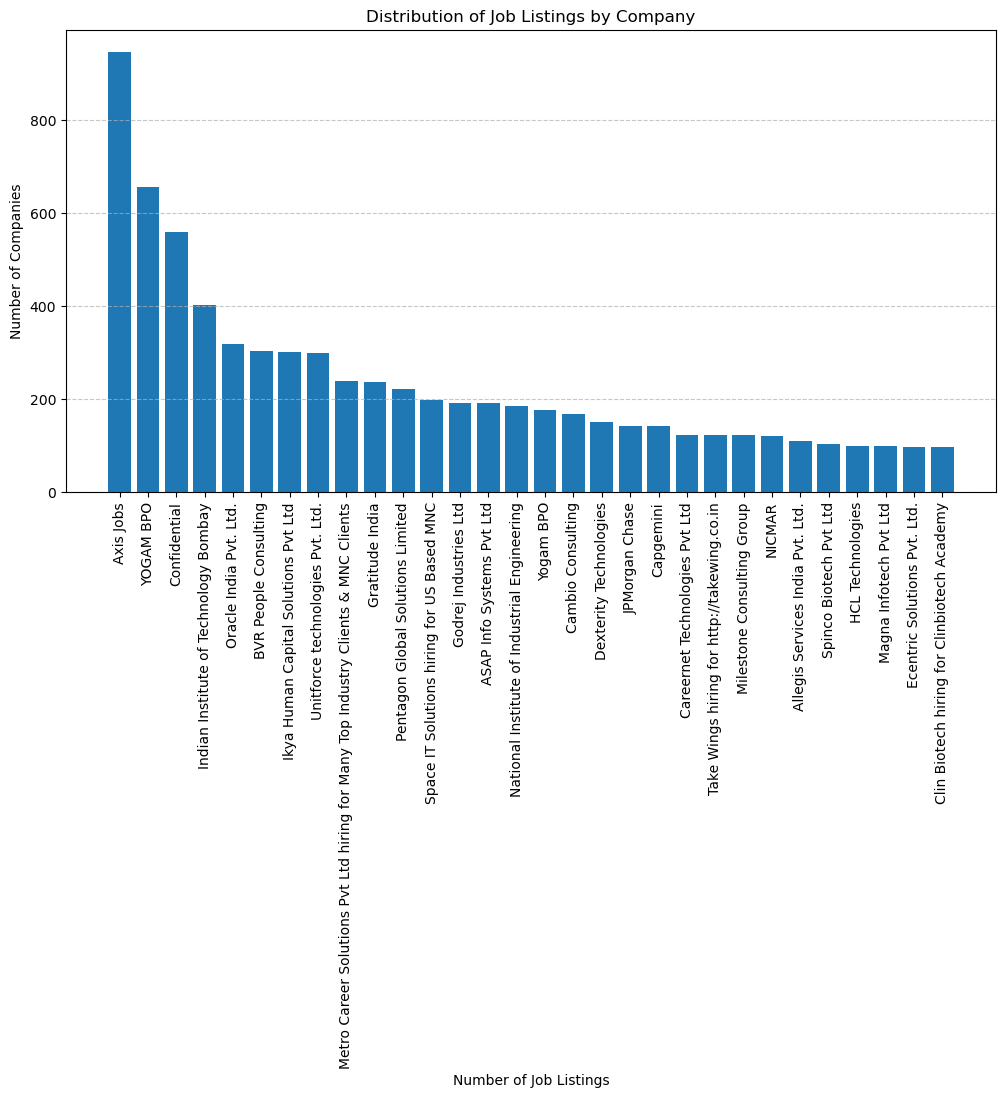

In [567]:
company_counts = df2['company'].value_counts().head(30) # since there are more than 8000 companies we cannot present

plt.figure(figsize=(12, 6))
plt.xticks(rotation = 90)
plt.bar(company_counts.index, company_counts.values)
plt.xlabel('Number of Job Listings')
plt.ylabel('Number of Companies')
plt.title('Distribution of Job Listings by Company')
plt.grid(axis='y', linestyle='--', alpha=0.7) # add a grid to the y-axis with a dashed line style 
plt.show()

##### Machine Learning
###### 	Salary Prediction:
•	Is it possible to predict the salary for a job listing based on features like location, experience, and skills?<br>
•	What regression models can be used for salary prediction?



In [647]:
df5 = df4.copy()

In [648]:
df5.head()

company  \
0                         MM Media Pvt Ltd   
1                       find live infotech   
11  Kinesis Management Consultant Pvt. Ltd   
12  Kinesis Management Consultant Pvt. Ltd   
13  Kinesis Management Consultant Pvt. Ltd   

                                    industry joblocation_address       skills  \
0           Media / Entertainment / Internet             Chennai         ITES   
1   Advertising / PR / MR / Event Management             Chennai    Marketing   
11           IT-Software / Software Services               Delhi  IT Software   
12           IT-Software / Software Services                 NCR  IT Software   
13           IT-Software / Software Services              Mumbai  IT Software   

   exp_range  exp_range_mean min_exp max_exp sal_min sal_max1  \
0      0 - 1             0.5      0        1  150000   225000   
1      0 - 0             0.0      0        0  150000   250000   
11     1 - 3             2.0      1        3  300000   650000   
12     1 - 3             2.0      1        3  300000   650000   
13     1 - 3             2.0      1        3  300000   650000   

       salary_range  salary_avg  
0   150000 - 225000      187500  
1   150000 - 250000      200000  
11  300000 - 650000      475000  
12  300000 - 650000      475000  
13  300000 - 650000      475000

In [649]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [669]:
X = df5[['joblocation_address','skills','exp_range_mean']]
X

joblocation_address       skills  exp_range_mean
0                 Chennai         ITES             0.5
1                 Chennai    Marketing             0.0
11                  Delhi  IT Software             2.0
12                    NCR  IT Software             2.0
13                 Mumbai  IT Software             2.0
...                   ...          ...             ...
46117           Bangalore  IT Software             6.5
46118                 NCR  IT Software             6.5
46129           Bangalore  IT Software             4.0
46130                 NCR  IT Software             4.0
46135           Bangalore  IT Software             7.5

[11486 rows x 3 columns]

In [670]:
location_encoded_df = pd.get_dummies(X['joblocation_address']).reset_index(drop = True)
location_encoded_df

Adilabad  Agartala  Agra  Ahmedabad  Ahmednagar  Ajmer  Akola  Aligarh  \
0             0         0     0          0           0      0      0        0   
1             0         0     0          0           0      0      0        0   
2             0         0     0          0           0      0      0        0   
3             0         0     0          0           0      0      0        0   
4             0         0     0          0           0      0      0        0   
...         ...       ...   ...        ...         ...    ...    ...      ...   
11481         0         0     0          0           0      0      0        0   
11482         0         0     0          0           0      0      0        0   
11483         0         0     0          0           0      0      0        0   
11484         0         0     0          0           0      0      0        0   
11485         0         0     0          0           0      0      0        0   

       Allahabad  Alleppey  ...  Vijayawada  Villupuram  Visakhapatnam  Vizag  \
0              0         0  ...           0           0              0      0   
1              0         0  ...           0           0              0      0   
2              0         0  ...           0           0              0      0   
3              0         0  ...           0           0              0      0   
4              0         0  ...           0           0              0      0   
...          ...       ...  ...         ...         ...            ...    ...   
11481          0         0  ...           0           0              0      0   
11482          0         0  ...           0           0              0      0   
11483          0         0  ...           0           0              0      0   
11484          0         0  ...           0           0              0      0   
11485          0         0  ...           0           0              0      0   

       Wadala  Warangal  Wayanad  Yamunanagar  delhi  pradesh  
0           0         0        0            0      0        0  
1           0         0        0            0      0        0  
2           0         0        0            0      0        0  
3           0         0        0            0      0        0  
4           0         0        0            0      0        0  
...       ...       ...      ...          ...    ...      ...  
11481       0         0        0            0      0        0  
11482       0         0        0            0      0        0  
11483       0         0        0            0      0        0  
11484       0         0        0            0      0        0  
11485       0         0        0            0      0        0  

[11486 rows x 214 columns]

In [671]:
skills_encoded_df = pd.get_dummies(X['skills']).reset_index(drop = True)
skills_encoded_df

Accounts  Analytics & Business Intelligence  Architecture  \
0             0                                  0             0   
1             0                                  0             0   
2             0                                  0             0   
3             0                                  0             0   
4             0                                  0             0   
...         ...                                ...           ...   
11481         0                                  0             0   
11482         0                                  0             0   
11483         0                                  0             0   
11484         0                                  0             0   
11485         0                                  0             0   

       Beauty/Fitness/Spa Services  Defence Forces  Design  \
0                                0               0       0   
1                                0               0       0   
2                                0               0       0   
3                                0               0       0   
4                                0               0       0   
...                            ...             ...     ...   
11481                            0               0       0   
11482                            0               0       0   
11483                            0               0       0   
11484                            0               0       0   
11485                            0               0       0   

       Engineering Design  Executive Assistant  Export  Fashion Designing  \
0                       0                    0       0                  0   
1                       0                    0       0                  0   
2                       0                    0       0                  0   
3                       0                    0       0                  0   
4                       0                    0       0                  0   
...                   ...                  ...     ...                ...   
11481                   0                    0       0                  0   
11482                   0                    0       0                  0   
11483                   0                    0       0                  0   
11484                   0                    0       0                  0   
11485                   0                    0       0                  0   

       ...  Production  Sales  Shipping  Site Engineering  Strategy  \
0      ...           0      0         0                 0         0   
1      ...           0      0         0                 0         0   
2      ...           0      0         0                 0         0   
3      ...           0      0         0                 0         0   
4      ...           0      0         0                 0         0   
...    ...         ...    ...       ...               ...       ...   
11481  ...           0      0         0                 0         0   
11482  ...           0      0         0                 0         0   
11483  ...           0      0         0                 0         0   
11484  ...           0      0         0                 0         0   
11485  ...           0      0         0                 0         0   

       Supply Chain  TV  Teaching  Top Management  Travel  
0                 0   0         0               0       0  
1                 0   0         0               0       0  
2                 0   0         0               0       0  
3                 0   0         0               0       0  
4                 0   0         0               0       0  
...             ...  ..       ...             ...     ...  
11481             0   0         0               0       0  
11482             0   0         0               0       0  
11483             0   0         0               0       0  
11484             0   0         0               0       0  
11485  

In [672]:
experience_df = X.exp_range_mean.reset_index(drop = True)
experience_df

0        0.5
1        0.0
2        2.0
3        2.0
4        2.0
        ... 
11481    6.5
11482    6.5
11483    4.0
11484    4.0
11485    7.5
Name: exp_range_mean, Length: 11486, dtype: float64

In [673]:
X = pd.concat([location_encoded_df, skills_encoded_df, experience_df], axis = 1)
X

Adilabad  Agartala  Agra  Ahmedabad  Ahmednagar  Ajmer  Akola  Aligarh  \
0             0         0     0          0           0      0      0        0   
1             0         0     0          0           0      0      0        0   
2             0         0     0          0           0      0      0        0   
3             0         0     0          0           0      0      0        0   
4             0         0     0          0           0      0      0        0   
...         ...       ...   ...        ...         ...    ...    ...      ...   
11481         0         0     0          0           0      0      0        0   
11482         0         0     0          0           0      0      0        0   
11483         0         0     0          0           0      0      0        0   
11484         0         0     0          0           0      0      0        0   
11485         0         0     0          0           0      0      0        0   

       Allahabad  Alleppey  ...  Sales  Shipping  Site Engineering  Strategy  \
0              0         0  ...      0         0                 0         0   
1              0         0  ...      0         0                 0         0   
2              0         0  ...      0         0                 0         0   
3              0         0  ...      0         0                 0         0   
4              0         0  ...      0         0                 0         0   
...          ...       ...  ...    ...       ...               ...       ...   
11481          0         0  ...      0         0                 0         0   
11482          0         0  ...      0         0                 0         0   
11483          0         0  ...      0         0                 0         0   
11484          0         0  ...      0         0                 0         0   
11485          0         0  ...      0         0                 0         0   

       Supply Chain  TV  Teaching  Top Management  Travel  exp_range_mean  
0                 0   0         0               0       0             0.5  
1                 0   0         0               0       0             0.0  
2                 0   0         0               0       0             2.0  
3                 0   0         0               0       0             2.0  
4                 0   0         0               0       0             2.0  
...             ...  ..       ...             ...     ...             ...  
11481             0   0         0               0       0             6.5  
11482             0   0         0               0       0             6.5  
11483             0   0         0               0       0             4.0  
11484             0   0         0               0       0             4.0  
11485             0   0         0               0       0             7.5  

[11486 rows x 246 columns]

In [674]:
y = y.reset_index(drop = True)
y

0         187500
1         200000
2         475000
3         475000
4         475000
          ...   
11481    2250000
11482    2250000
11483    1125000
11484    1125000
11485    1700000
Name: salary_avg, Length: 11486, dtype: int64

In [675]:
from sklearn.model_selection import train_test_split

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [677]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9188, 246), (2298, 246), (9188,), (2298,))

In [678]:
model = LinearRegression()

In [679]:
model

LinearRegression()

In [680]:
model.fit(X_train, y_train)

LinearRegression()

In [681]:
y_pred = model.predict(X_test)
y_pred

array([482544., 731888., 360368., ..., 347472.,  11088., 475360.])

In [682]:
mean_absolute_error(y_test, y_pred) ** .5

21765544.304598615

In [683]:
0.47330928322047405

0.47330928322047405

In [684]:
model.score(X_test, y_test)

-1.3532636291860047e+20

In [685]:
r2_score(y_test, y_pred)

-1.3532636291860047e+20

In [686]:
mean_squared_error(y_test, y_pred)

4.3159899043836625e+31